# Employee Attrition Prediction - Classification

## 1. Introduction

### 1.1 Objectives

- Utilize a machine learning model to predict employee attrition
- To understand the key factors contributing to employee attrition.
- To provide actionable recommendations for improving employee retention.

### 1.2 Estimated Effects

- Cost Reduction:Reduce the costs associated with hiring and training new employees by lowering attrition rates.
- Improved Employee Engagement: By understanding the factors that contribute to attrition, the company can create a more engaging and supportive work environment.


### 1.3 Data Explanation

- This dataset is sourced from Kaggle datasets and can be accessed [here](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download).

- The dataset aims to uncover the key factors that contribute to employee attrition.

- This is a fictional dataset created by IBM data scientists, specifically for the purpose of HR analytics and exploring employee performance and attrition factors.


**Categorical Variables Explanation**

| **Index** | **Education**  | **EnvironmentSatisfaction** | **JobInvolvement** | **JobSatisfaction** | **PerformanceRating** | **RelationshipSatisfaction** | **WorkLifeBalance** |
|-----------|----------------|-----------------------------|--------------------|---------------------|-----------------------|-----------------------------|---------------------|
| 1         | Below College  | Low                         | Low                | Low                 | Low                   | Low                         | Bad                 |
| 2         | College        | Medium                      | Medium             | Medium              | Good                  | Medium                      | Good                |
| 3         | Bachelor       | High                        | High               | High                | Excellent             | High                        | Better              |
| 4         | Master         | Very High                   | Very High          | Very High           | Outstanding           | Very High                   | Best                |
| 5         | Doctor         |                             |                    |                     |                       |                             |                     |

## 2. EDA

In [2]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# library for statistic
from scipy import stats
from scipy.stats import chi2_contingency, kruskal
from scipy.stats import boxcox, norm
from scipy.stats import skew
from scipy.stats import kurtosis


# library for data preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


# library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import shap

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
random_state = 42

### 2.1 Load and check the Data

### Load the dataset

In [6]:
df = pd.read_csv("./Dataset/HR_Employee_Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 2.2 Data Summary

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
df.isna().sum().sort_values(ascending=False)

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole   

In [15]:
print("Number of duplicated rows: ", len(df[df.duplicated()]))

Number of duplicated rows:  0


In [17]:
# Check unique values of columns

for column in list(df.columns):
    print(column,":", df[column].nunique(), " ",df[column].unique())
    print()

Age : 43   [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

Attrition : 2   ['Yes' 'No']

BusinessTravel : 3   ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

DailyRate : 886   [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181

### Convert the data type of the categorical variable from integer to object

In [20]:
# Change data type from int to object for categorical variables
elements_to_convert = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"]

for column in elements_to_convert:
    df[column] = df[column].astype(object)

In [22]:
# Identify categorical and numeric columns

categorical_cols = list(df.select_dtypes(include=['object']).columns)
numeric_cols = list(df.select_dtypes(include=['int64']).columns)
target_col = "Attrition"

In [24]:
# Summary
print("number of rows: ", len(df))
print("number of columns: ", len(df.columns))
print("number of cateogorical variables: " , len(categorical_cols))
print("number of numerical variables: ", len(numeric_cols))

number of rows:  1470
number of columns:  35
number of cateogorical variables:  18
number of numerical variables:  17


### Summary

- Number of observations : 1470

- Number of Variables : 31
    - numeric : 14
    - categorical : 17
- Number of Missing Cells : 0
- Number of Duplicated Rows : 0

### 2.3 Dependent Data Explore

In [28]:
categorical_cols.remove(target_col)

In [30]:
df[target_col].describe()

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object

<Axes: xlabel='Attrition', ylabel='count'>

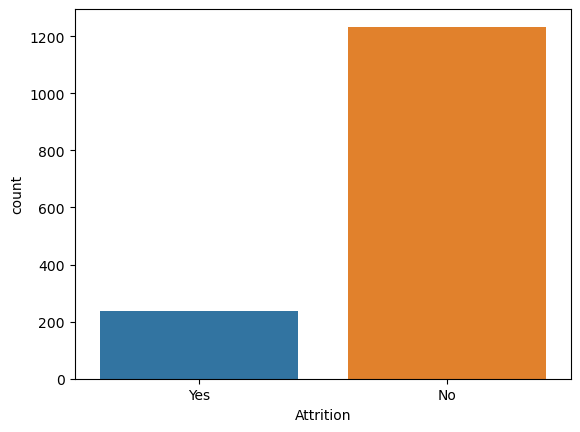

In [32]:
sns.countplot(x=target_col, data=df, hue=target_col)

### 2.4 Independent Data Explore

### Categorical Variable Analysis

In [36]:
df[categorical_cols].nunique().sort_values()

Over18                      1
PerformanceRating           2
OverTime                    2
Gender                      2
BusinessTravel              3
Department                  3
MaritalStatus               3
RelationshipSatisfaction    4
JobSatisfaction             4
WorkLifeBalance             4
JobInvolvement              4
EnvironmentSatisfaction     4
StockOptionLevel            4
JobLevel                    5
Education                   5
EducationField              6
JobRole                     9
dtype: int64

In [38]:
# Remove columns that have only 1 unique value.

df = df.drop(["Over18"], axis=1)
categorical_cols.remove("Over18")

In [40]:
df[categorical_cols].describe()

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,5,6,4,2,4,5,9,4,3,2,2,4,4,4
top,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,3,1,Sales Executive,4,Married,No,3,3,0,3
freq,1043,961,572,606,453,882,868,543,326,459,673,1054,1244,459,631,893


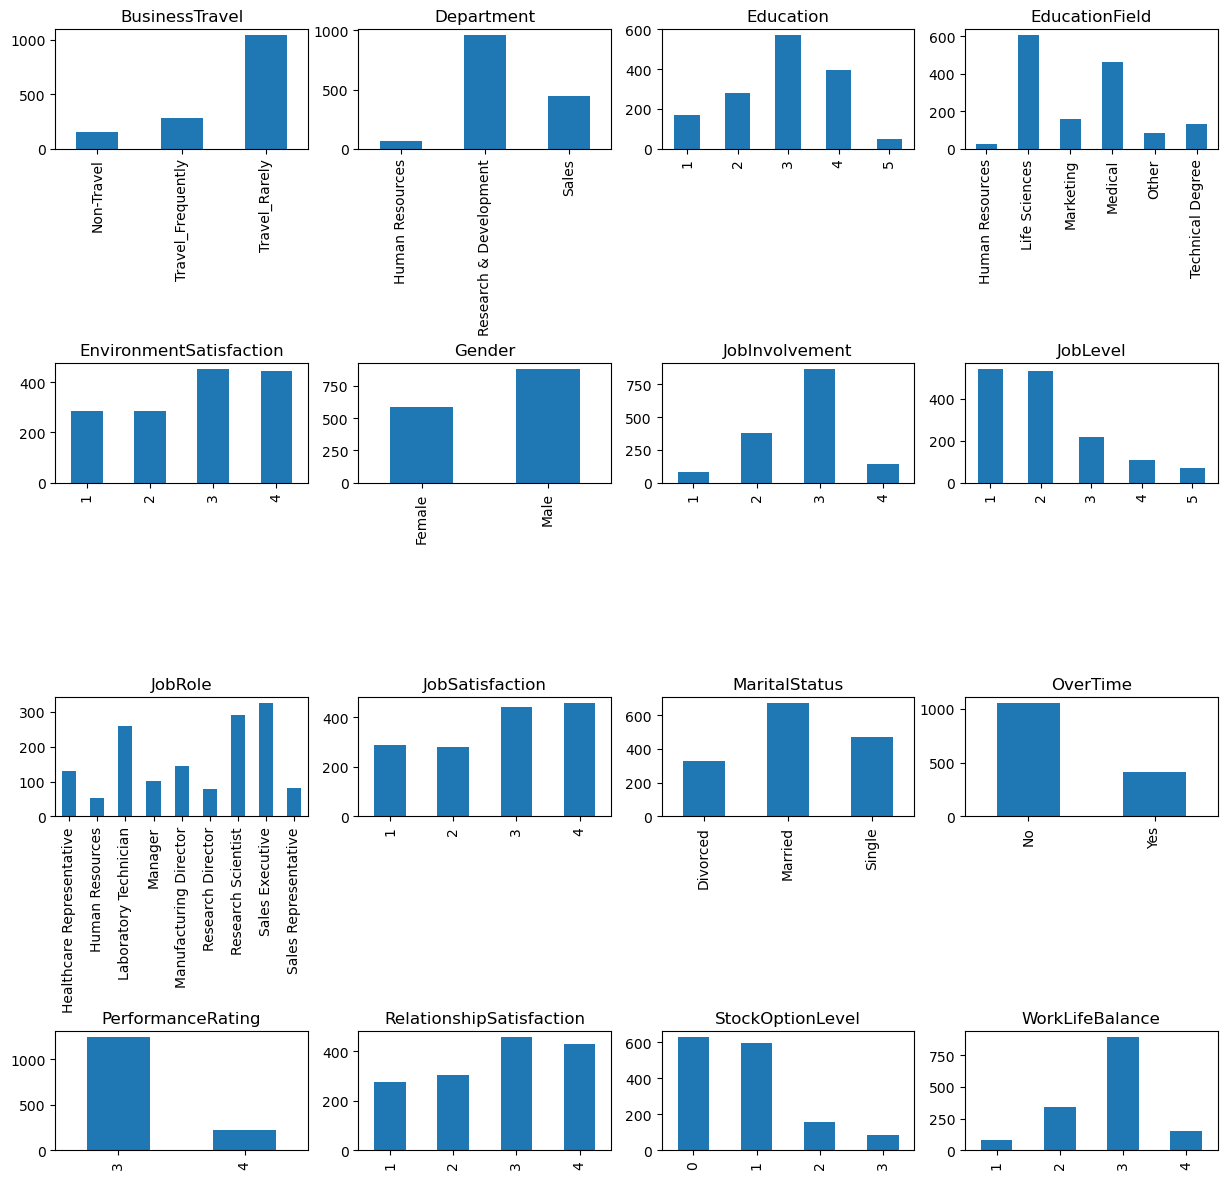

In [42]:
# Draw Bar plots for categorical variables

plt.figure(figsize=(15,15))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.02, hspace=1.8, wspace=0.2)
for column in categorical_cols:
    plt.subplot(5,4,x)
    x = x+1
    df[column].value_counts().sort_index().plot(kind='bar')
    plt.title(column)
    plt.xlabel('') 

plt.show()

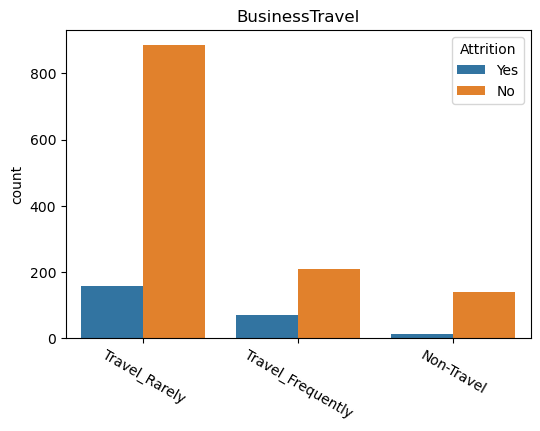

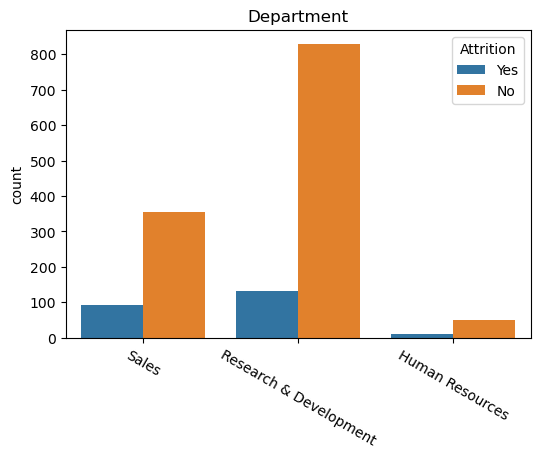

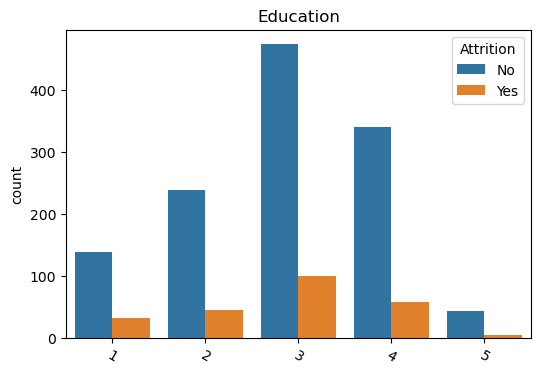

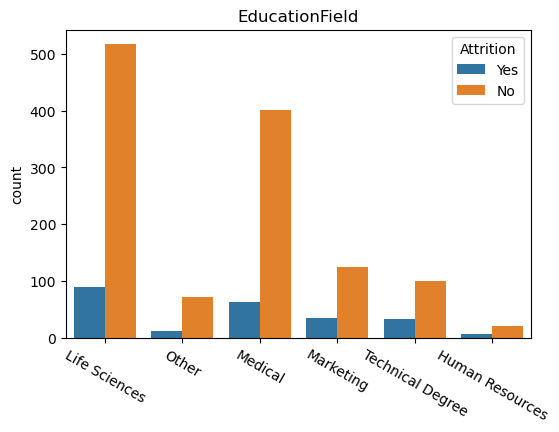

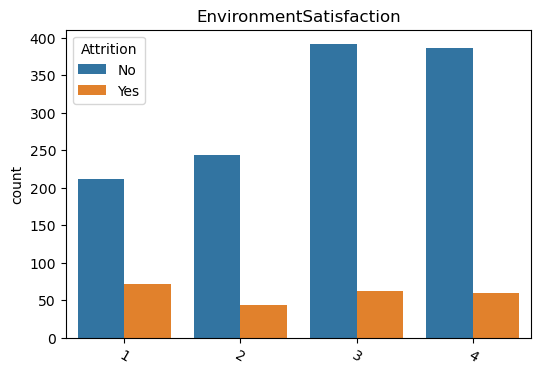

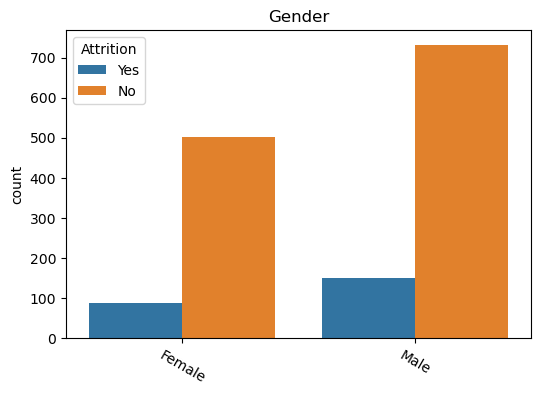

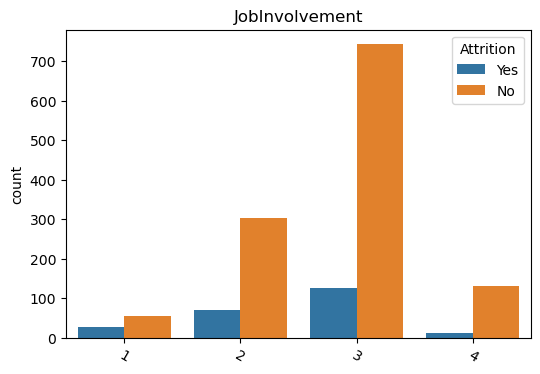

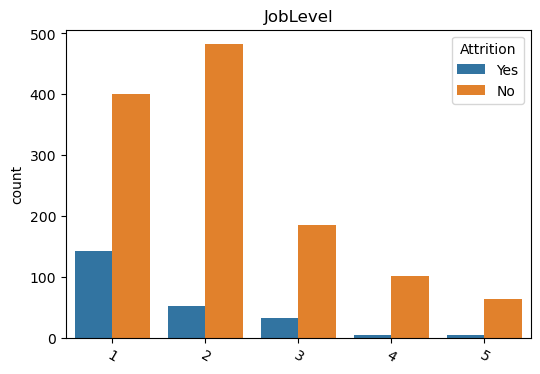

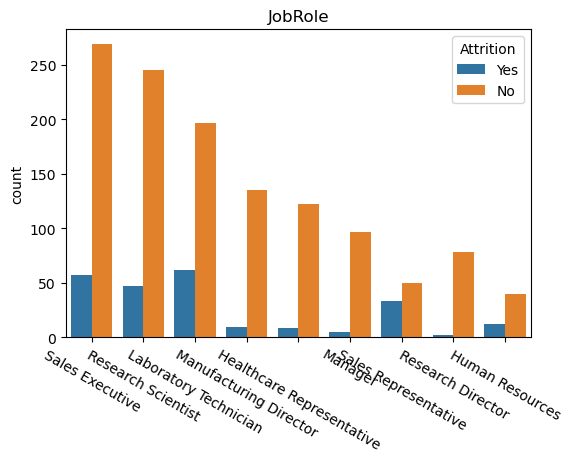

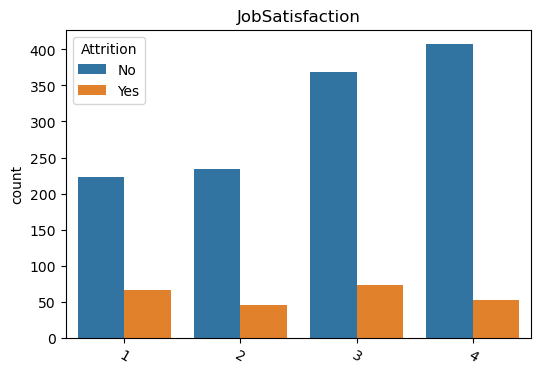

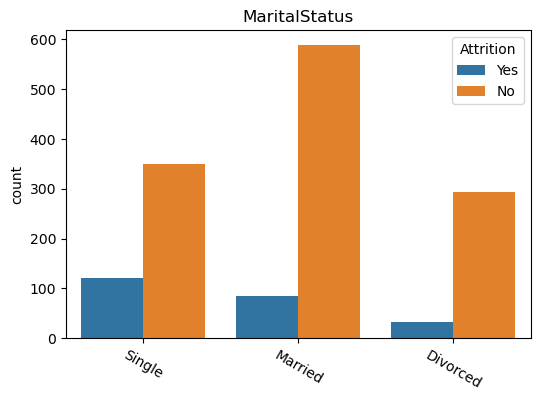

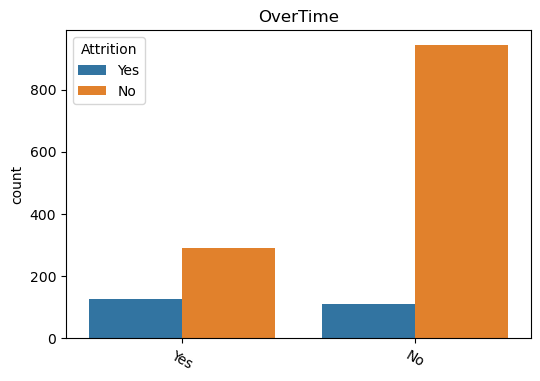

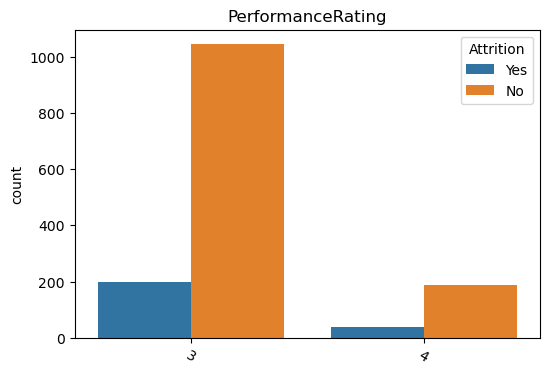

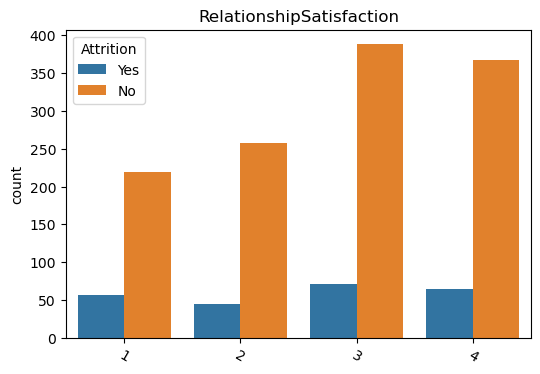

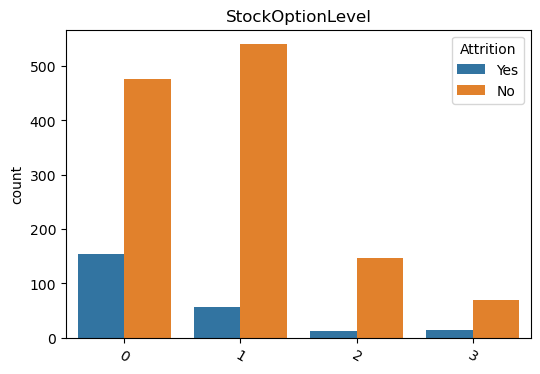

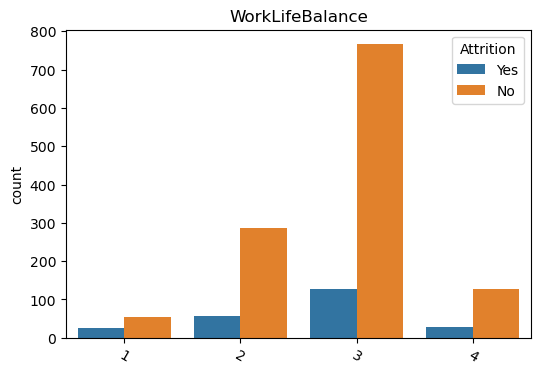

In [43]:
for column in categorical_cols:
    plt.figure(figsize=(6, 4))
    # Create the bar plot with hue
    sns.countplot(data=df, x=column, hue=target_col)
    plt.title(column)
    plt.xticks(rotation = -30)
    plt.xlabel('')
    
    # Show the plot
    plt.show()

### Chi-Squre test

In [46]:
selected_features_by_chi = []

for column in categorical_cols:

    statistic, pvalue, _, _ = chi2_contingency(pd.crosstab(df[target_col], df[column]))  
    if pvalue <= 0.05:
        selected_features_by_chi.append(column)
    print(column, ", ",statistic,", ", pvalue)

print()
print("all features : ", len(categorical_cols))
print("selected features : ", len(selected_features_by_chi), selected_features_by_chi)

BusinessTravel ,  24.182413685655174 ,  5.608614476449931e-06
Department ,  10.79600732241067 ,  0.004525606574479633
Education ,  3.0739613982367193 ,  0.5455253376565949
EducationField ,  16.024674119585423 ,  0.00677398013902522
EnvironmentSatisfaction ,  22.503881435842295 ,  5.123468906289425e-05
Gender ,  1.1169671241970975 ,  0.29057244902890855
JobInvolvement ,  28.492021234659283 ,  2.863180636713418e-06
JobLevel ,  72.52901310667391 ,  6.634684715458909e-15
JobRole ,  86.19025367670434 ,  2.7524816380506575e-15
JobSatisfaction ,  17.505077010348 ,  0.0005563004510387556
MaritalStatus ,  46.163676540848705 ,  9.45551106034083e-11
OverTime ,  87.56429365828768 ,  8.15842372153832e-21
PerformanceRating ,  0.00015475439428271534 ,  0.9900745465934576
RelationshipSatisfaction ,  5.241067859713708 ,  0.15497244371052626
StockOptionLevel ,  60.59830108612225 ,  4.379390336108353e-13
WorkLifeBalance ,  16.3250970916474 ,  0.0009725698845348821

all features :  16
selected features : 

### Numeric Variable Analysis

In [48]:
df[numeric_cols].nunique().sort_values()

StandardHours                 1
EmployeeCount                 1
TrainingTimesLastYear         7
NumCompaniesWorked           10
PercentSalaryHike            15
YearsSinceLastPromotion      16
YearsWithCurrManager         18
YearsInCurrentRole           19
DistanceFromHome             29
YearsAtCompany               37
TotalWorkingYears            40
Age                          43
HourlyRate                   71
DailyRate                   886
MonthlyIncome              1349
MonthlyRate                1427
EmployeeNumber             1470
dtype: int64

In [49]:
# Remove the columns which is a ID column or have only 1 unique value

elements_to_remove = ["StandardHours", "EmployeeCount", "EmployeeNumber"]

df = df.drop(elements_to_remove, axis=1)

for element in elements_to_remove:
    if element in numeric_cols:
        numeric_cols.remove(element)

In [54]:
df[numeric_cols].describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


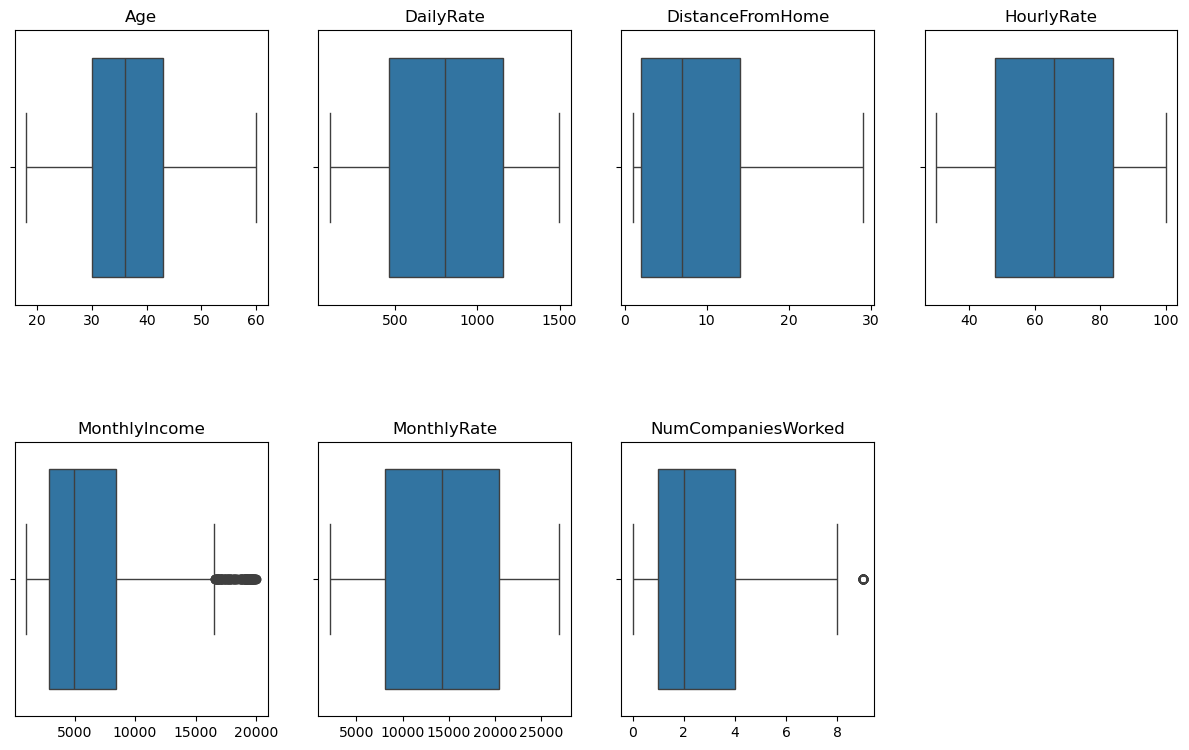

In [56]:
# Split the list into two halves

midpoint = len(numeric_cols) // 2
first_half = numeric_cols[:midpoint]
second_half = numeric_cols[midpoint:]

# Plot the first half
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.5, wspace=0.2)

for i, column in enumerate(first_half, start=1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=column, data=df)
    plt.title(column)
    plt.xlabel('')

plt.show()


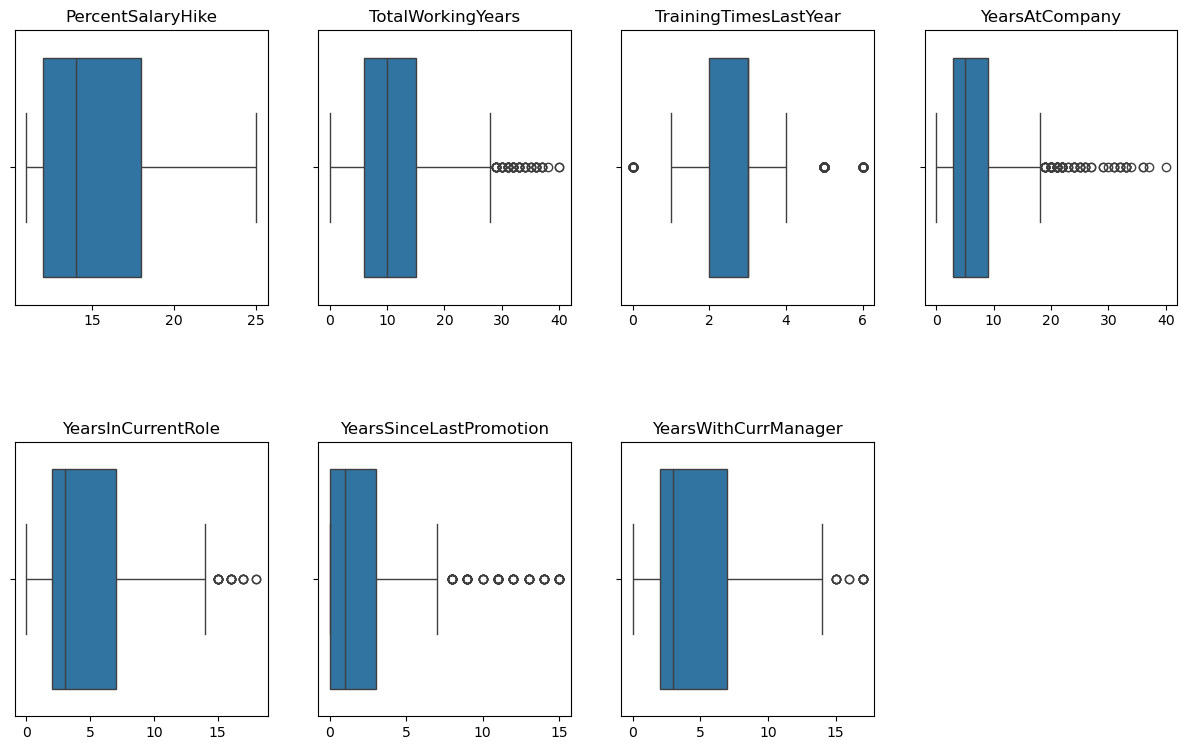

In [58]:
# Plot the second half

plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.5, wspace=0.2)

for i, column in enumerate(second_half, start=1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=column, data=df)
    plt.title(column)
    plt.xlabel('')
    
plt.show()

In [60]:
# Check numerical columns' skewness and kurtosis for checking need for scaling

for column in numeric_cols:
    skewness = skew(df[column])
    kurt = kurtosis(df[column])
    print(f"{column} skew: {skewness:.4f} kurtosis: {kurt:.4f}")

Age skew: 0.4129 kurtosis: -0.4069
DailyRate skew: -0.0035 kurtosis: -1.2038
DistanceFromHome skew: 0.9571 kurtosis: -0.2281
HourlyRate skew: -0.0323 kurtosis: -1.1964
MonthlyIncome skew: 1.3684 kurtosis: 0.9977
MonthlyRate skew: 0.0186 kurtosis: -1.2149
NumCompaniesWorked skew: 1.0254 kurtosis: 0.0061
PercentSalaryHike skew: 0.8203 kurtosis: -0.3037
TotalWorkingYears skew: 1.1160 kurtosis: 0.9111
TrainingTimesLastYear skew: 0.5526 kurtosis: 0.4892
YearsAtCompany skew: 1.7627 kurtosis: 3.9181
YearsInCurrentRole skew: 0.9164 kurtosis: 0.4717
YearsSinceLastPromotion skew: 1.9823 kurtosis: 3.5963
YearsWithCurrManager skew: 0.8326 kurtosis: 0.1664


<Axes: >

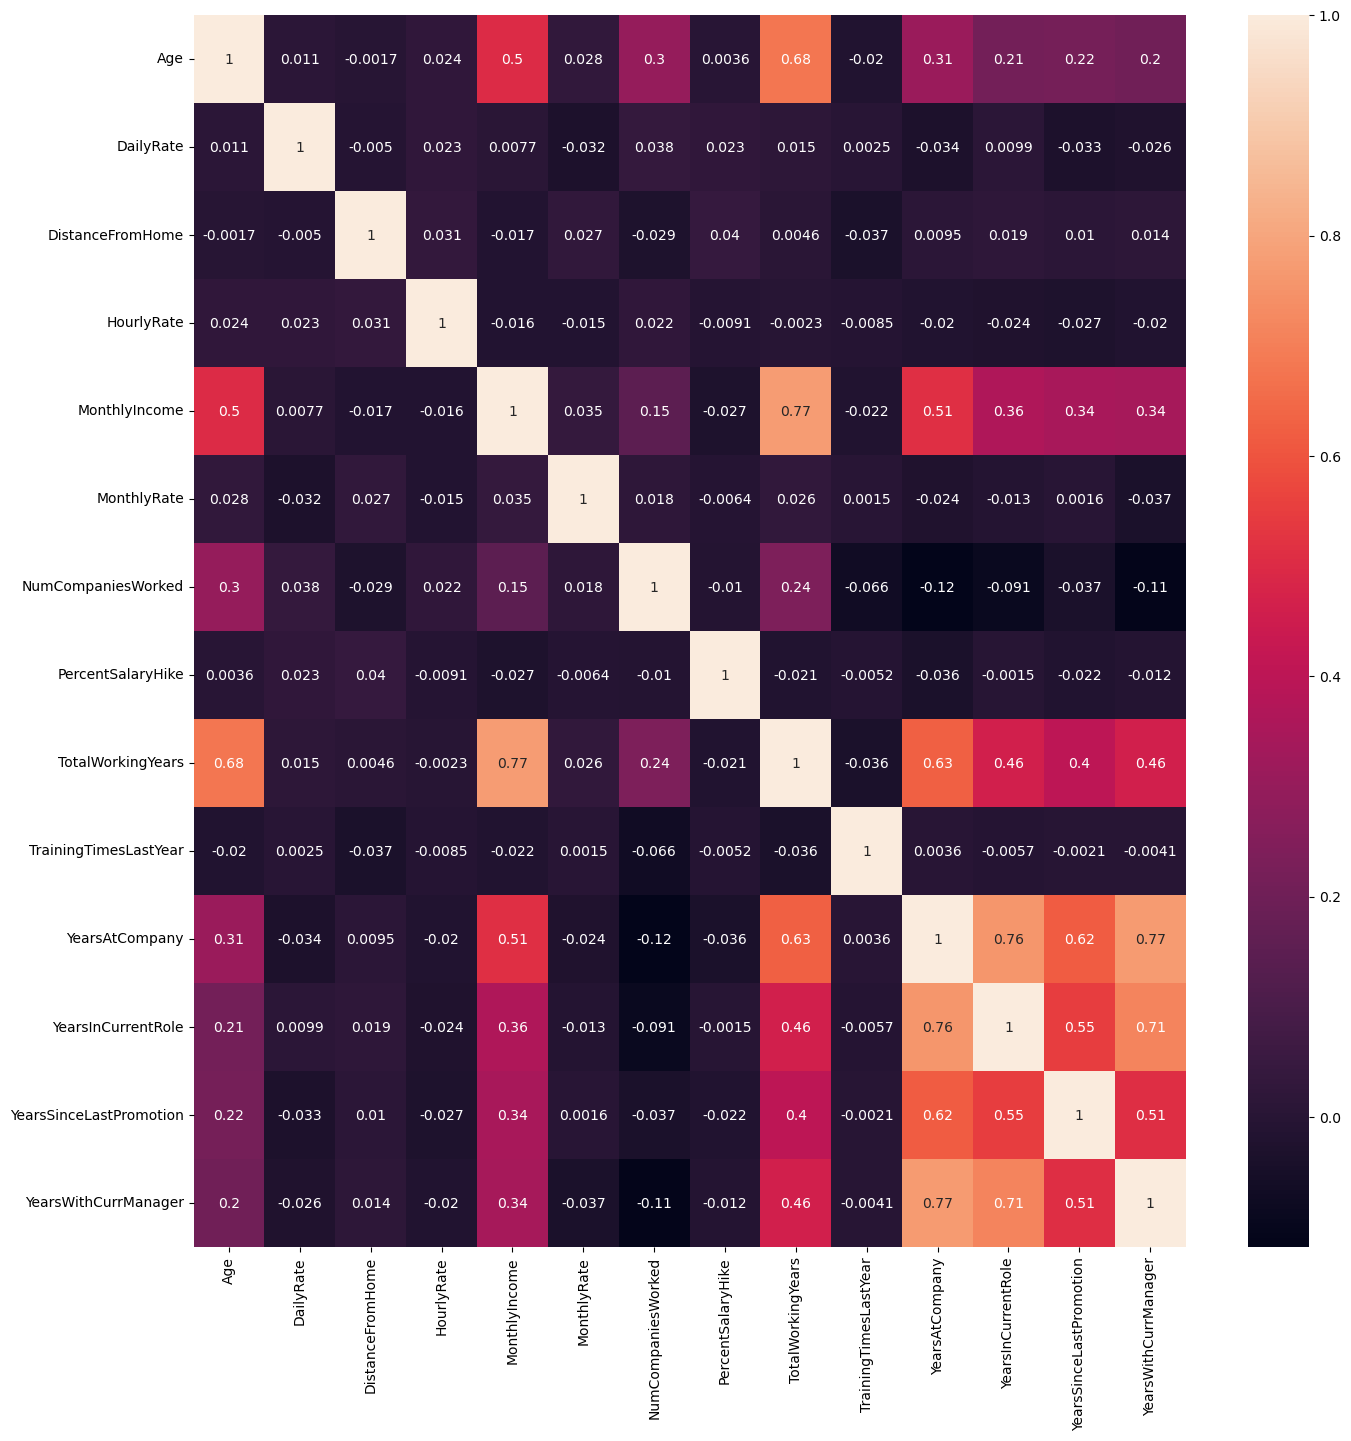

In [62]:
# Correlation Heatmap

df_corr = df[numeric_cols].corr()
plt.figure(figsize=(16,16))

sns.heatmap(df_corr, annot=True)

### VIF-Score to check multicolinearity

In [65]:
def caculate_vif(df_target):
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(df_target.values, i) for i in range(df_target.shape[1])]
    vif["Feature"] = df_target.columns
    return vif

In [67]:
caculate_vif(df[numeric_cols]).sort_values(by = "VIF", ascending = False)

,VIF,Feature
0,25.496860,Age
7,13.578688,PercentSalaryHike
8,13.311109,TotalWorkingYears
10,10.485271,YearsAtCompany
3,9.767720,HourlyRate
4,7.286833,MonthlyIncome
13,6.380952,YearsWithCurrManager
11,6.342271,YearsInCurrentRole
9,5.302141,TrainingTimesLastYear
5,4.737393,MonthlyRate


In [69]:
caculate_vif(df[numeric_cols].drop("Age", axis=1)).sort_values(by = "VIF", ascending = False)

,VIF,Feature
6,11.567921,PercentSalaryHike
7,10.594656,TotalWorkingYears
9,10.469203,YearsAtCompany
2,8.935033,HourlyRate
3,7.286819,MonthlyIncome
12,6.380871,YearsWithCurrManager
10,6.342163,YearsInCurrentRole
8,5.091741,TrainingTimesLastYear
0,4.640055,DailyRate
4,4.605670,MonthlyRate


In [71]:
caculate_vif(df[numeric_cols].drop(["Age", "PercentSalaryHike", "TotalWorkingYears"], axis=1)).sort_values(by = "VIF", ascending = False)

,VIF,Feature
7,9.432830,YearsAtCompany
2,7.507071,HourlyRate
10,6.346938,YearsWithCurrManager
8,6.322306,YearsInCurrentRole
6,4.710238,TrainingTimesLastYear
0,4.365355,DailyRate
4,4.343285,MonthlyRate
3,4.212697,MonthlyIncome
9,2.435655,YearsSinceLastPromotion
5,2.263575,NumCompaniesWorked


In [73]:
elements_to_remove_by_vif = ["Age", "PercentSalaryHike", "TotalWorkingYears", "YearsAtCompany"]

### Anlayze relationship between numeric columns and target column

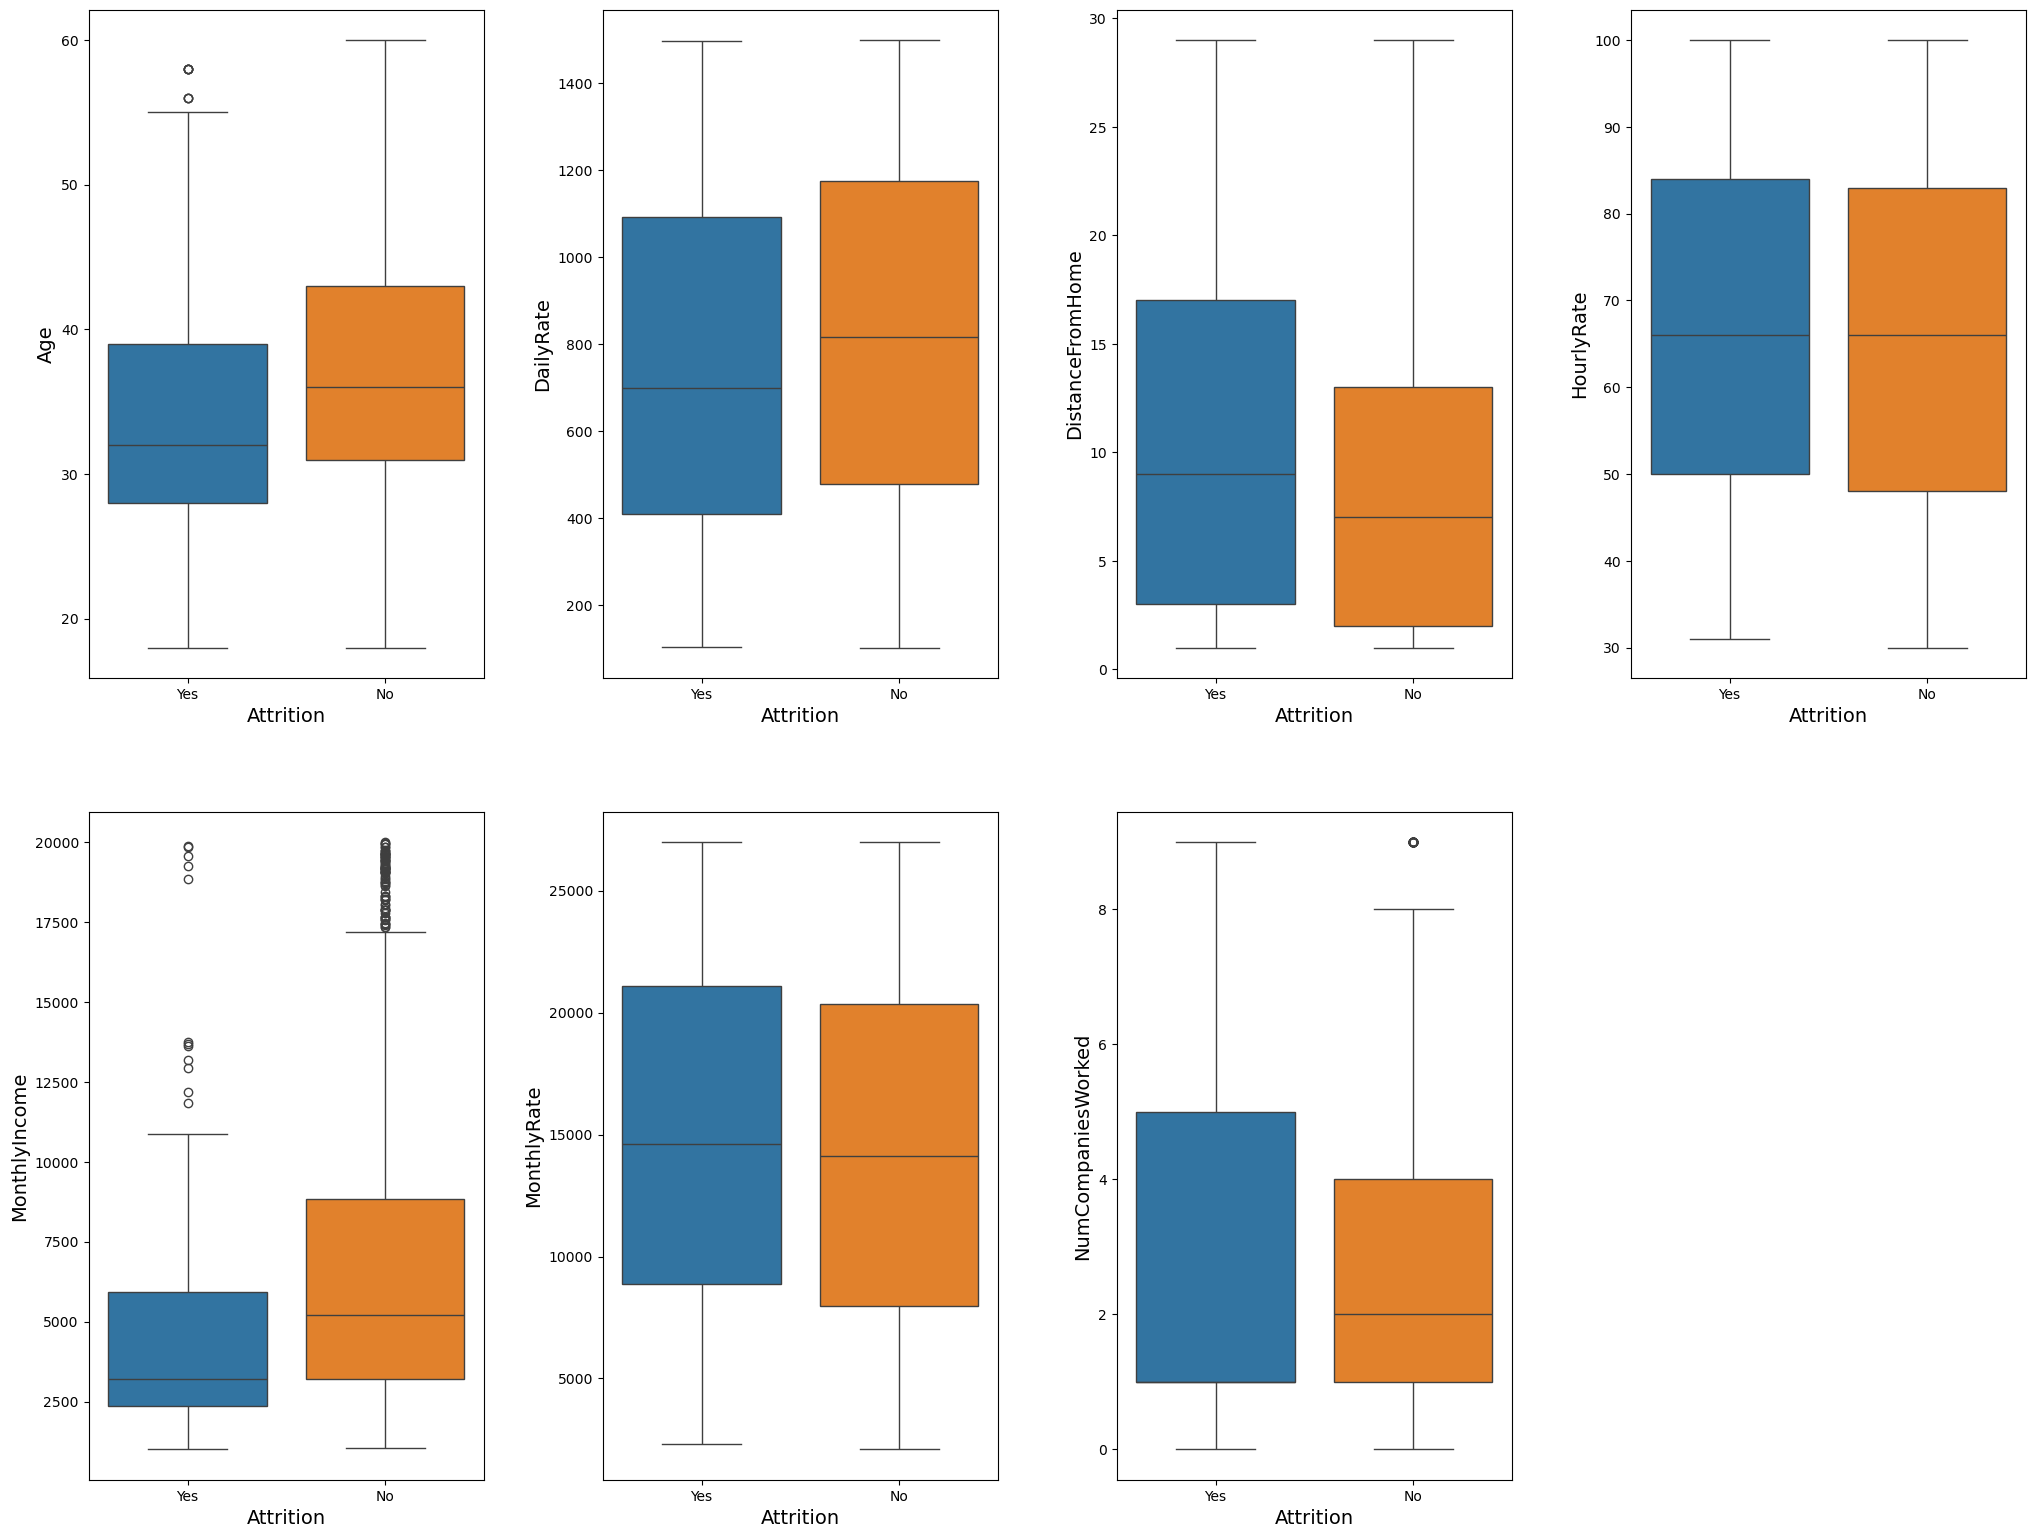

In [76]:
midpoint = len(numeric_cols) // 2
first_half = numeric_cols[:midpoint]
second_half = numeric_cols[midpoint:]

plt.figure(figsize=(25,15))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.3)

for column in first_half:
    plt.subplot(2,4,x)
    x = x + 1
    sns.boxplot(data=df,x=target_col,y=column, hue = target_col)
    plt.ylabel(column, fontsize=14)
    plt.xlabel(target_col, fontsize=14)
    
plt.show()

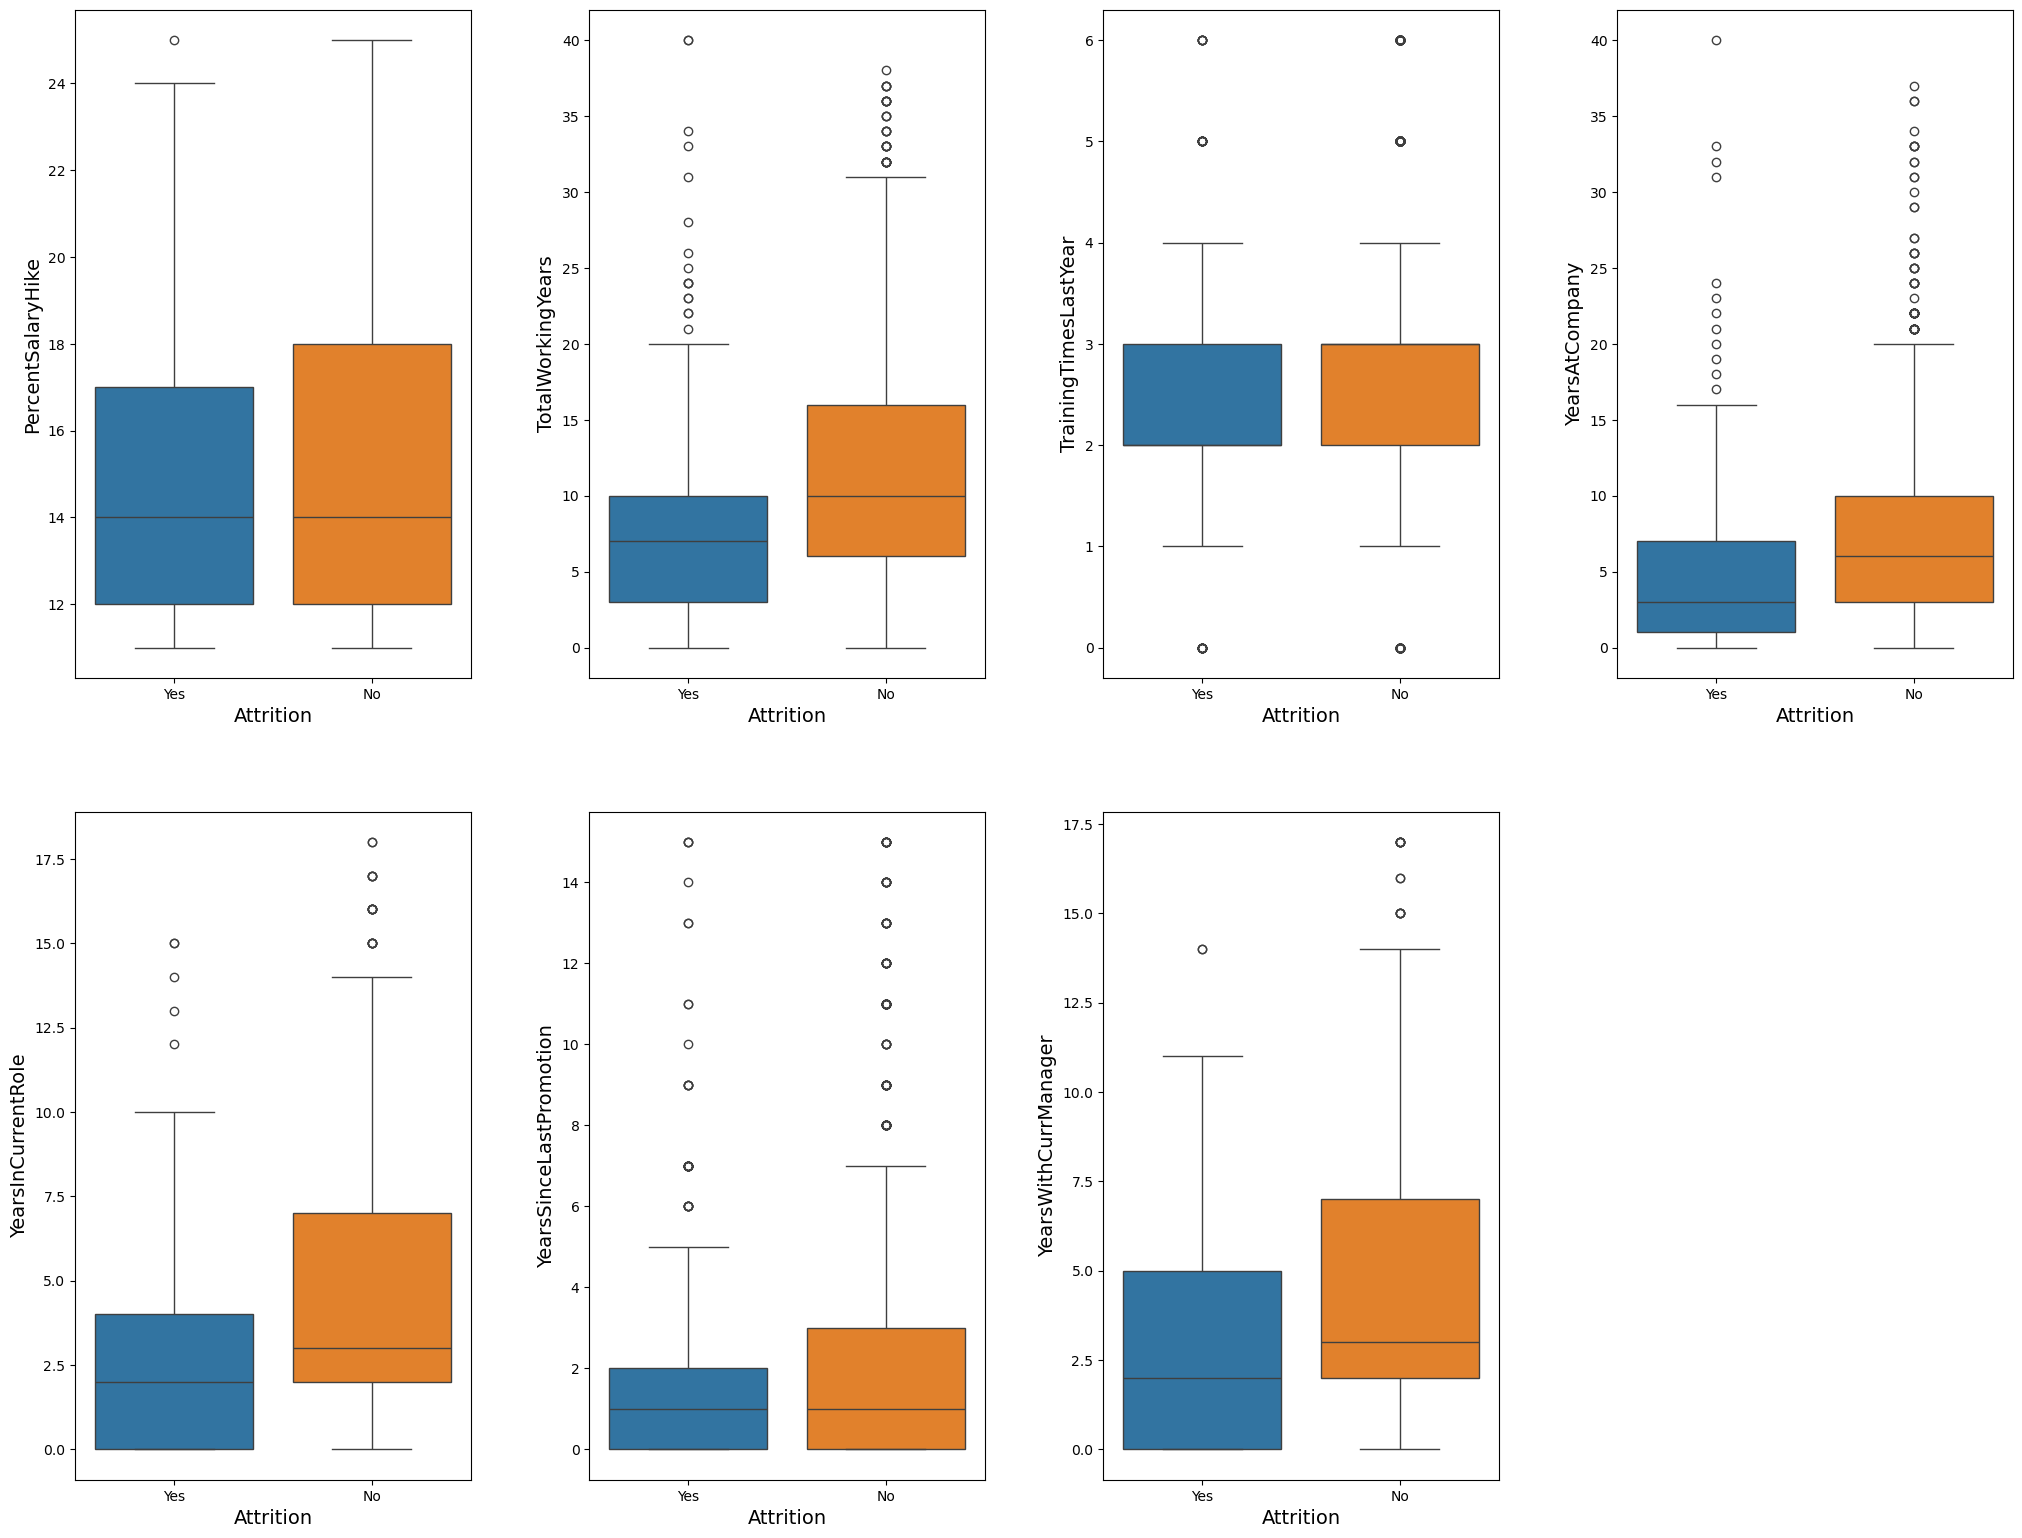

In [77]:
plt.figure(figsize=(25,15))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.3)

for column in second_half:
    plt.subplot(2,4,x)
    x = x + 1
    sns.boxplot(data=df,x=target_col,y=column, hue = target_col)
    plt.ylabel(column, fontsize=14)
    plt.xlabel(target_col, fontsize=14)
    
plt.show()


### Check normality of numerical variables

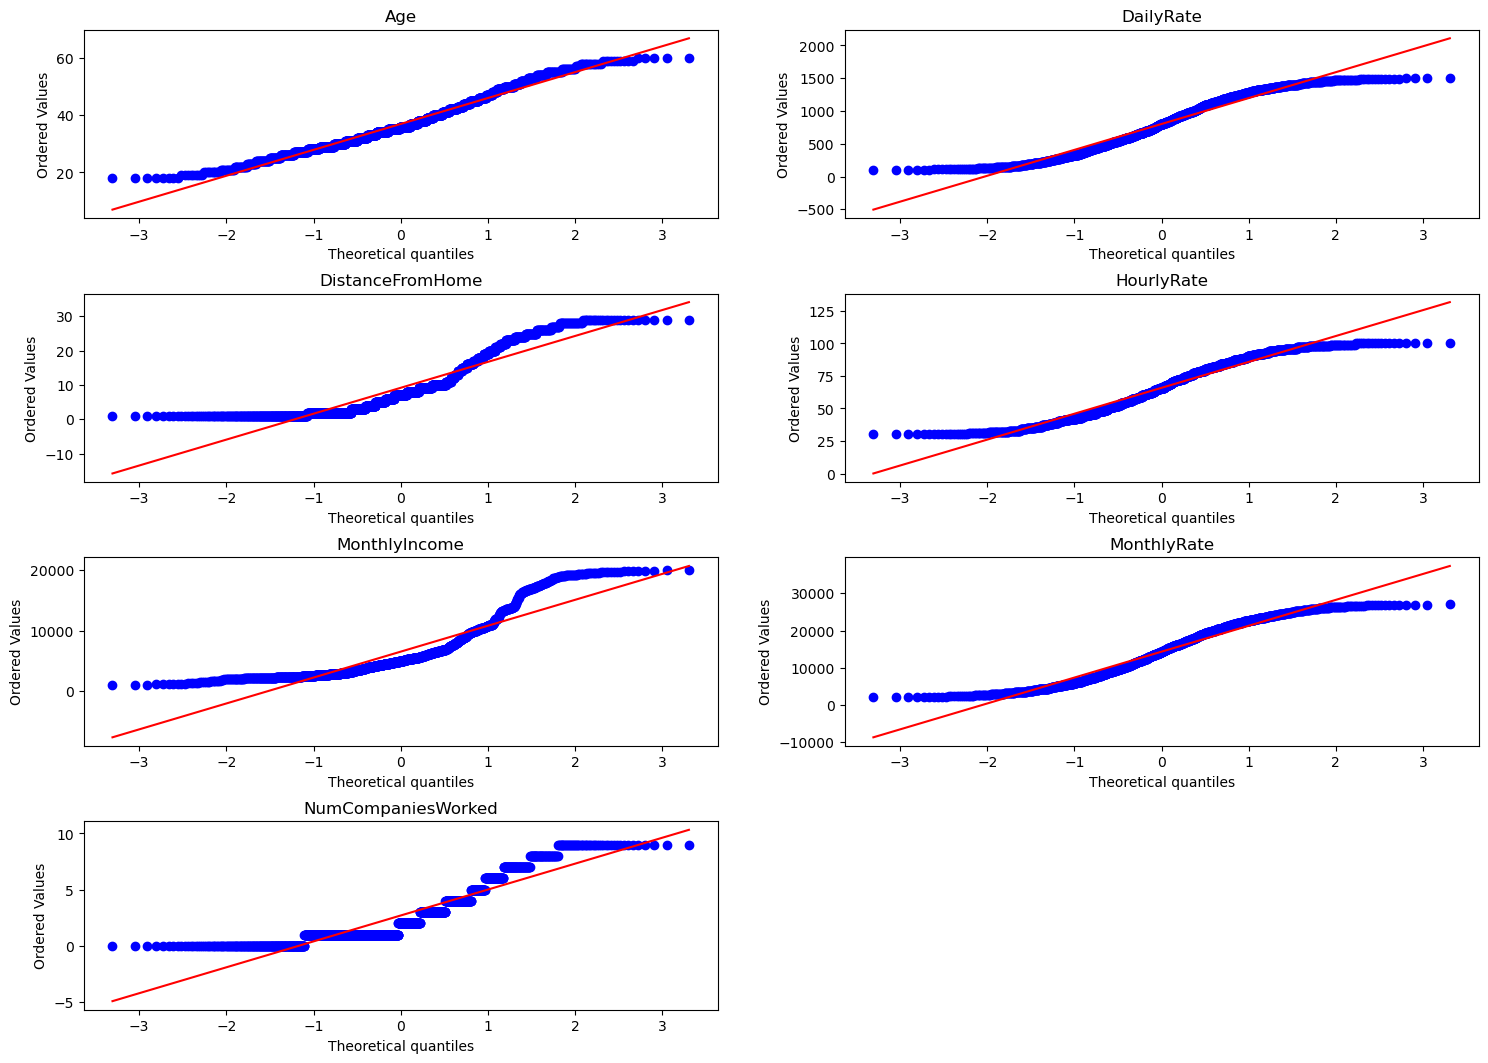

In [81]:
# numeric column 정규성 확인
plt.figure(figsize=(18,10))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)

for column in first_half:
    plt.subplot(4,2,x)
    x = x+1
    stats.probplot(df[column], dist=stats.norm, plot=plt)
    plt.title(column)
    
plt.show()

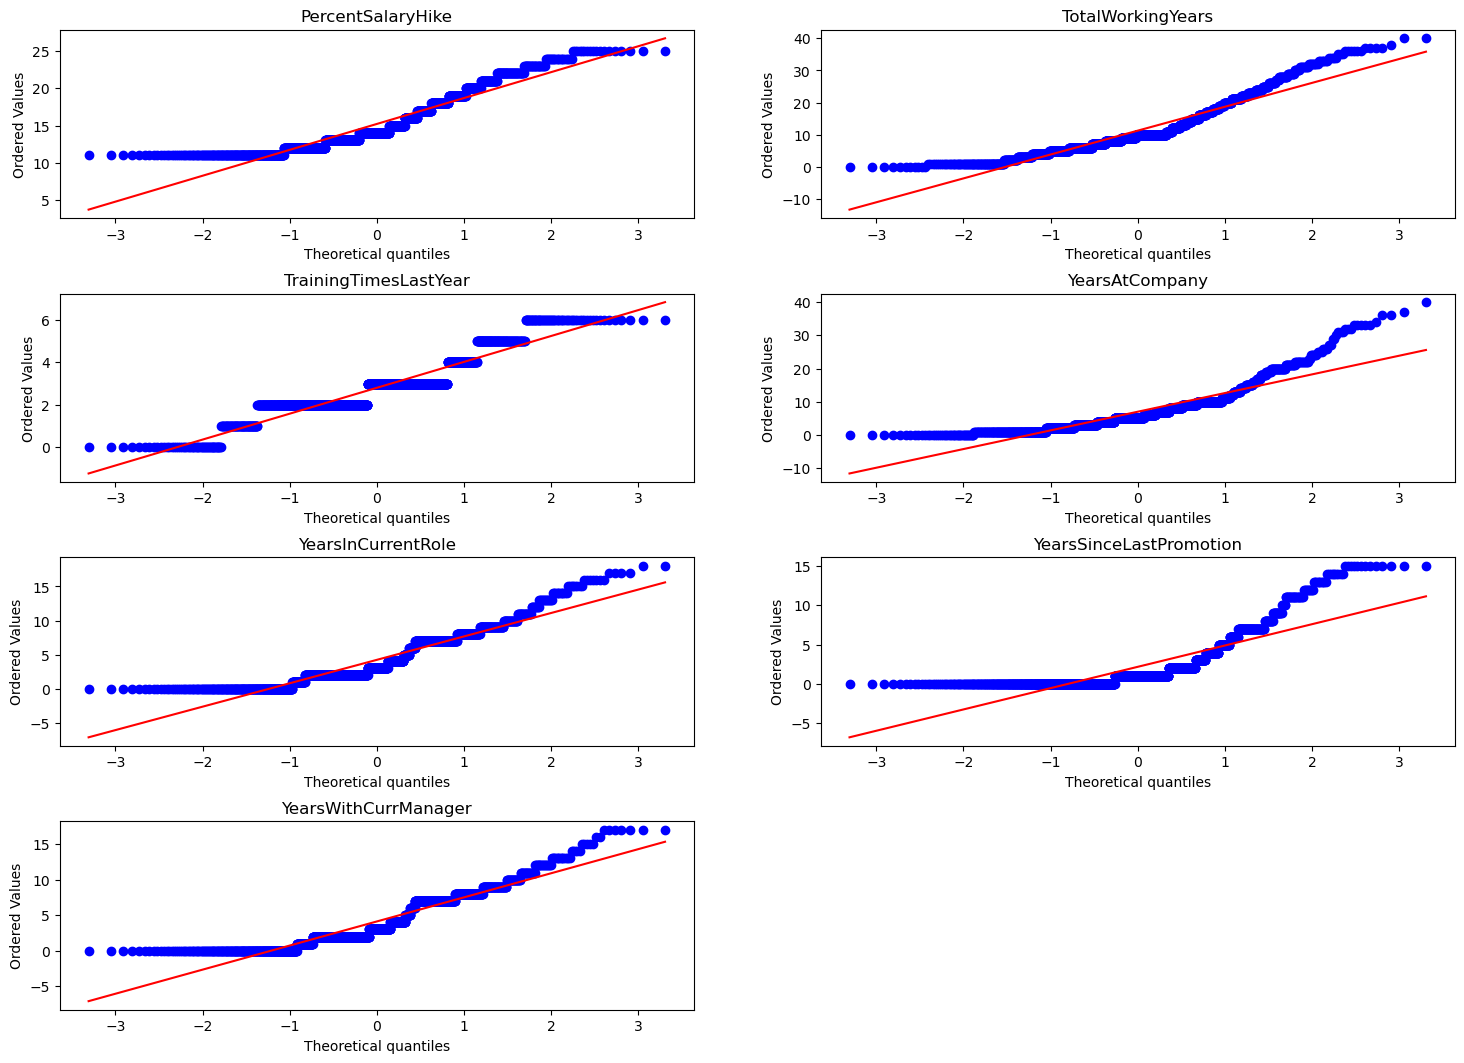

In [82]:
plt.figure(figsize=(18,10))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
for column in second_half:
    plt.subplot(4,2,x)
    x = x+1
    stats.probplot(df[column], dist=stats.norm, plot=plt)
    plt.title(column)
plt.show()

In [84]:
normal_distributed_columns = []

for column in numeric_cols:
    statistic, pvalue = stats.shapiro(df[column])
    if pvalue >= 0.05:
        normal_distributed_columns.append(column)
    print(f"{column}, statistic: {statistic:.3f}, pvalue: {pvalue}")

print(f"Number of Nomrally distributed feqtures: {len(normal_distributed_columns)}")

Age, statistic: 0.977, pvalue: 2.036924313471394e-14
DailyRate, statistic: 0.954, pvalue: 5.3293297427466794e-21
DistanceFromHome, statistic: 0.862, pvalue: 4.080847148972798e-34
HourlyRate, statistic: 0.955, pvalue: 7.418846333331133e-21
MonthlyIncome, statistic: 0.828, pvalue: 4.40239403650134e-37
MonthlyRate, statistic: 0.954, pvalue: 5.516502411789095e-21
NumCompaniesWorked, statistic: 0.849, pvalue: 2.6321032253527873e-35
PercentSalaryHike, statistic: 0.901, pvalue: 7.480739720656666e-30
TotalWorkingYears, statistic: 0.907, pvalue: 5.630922142286912e-29
TrainingTimesLastYear, statistic: 0.895, pvalue: 1.583130646669529e-30
YearsAtCompany, statistic: 0.839, pvalue: 3.6688670459820286e-36
YearsInCurrentRole, statistic: 0.896, pvalue: 2.142707183927569e-30
YearsSinceLastPromotion, statistic: 0.704, pvalue: 4.772964882348663e-45
YearsWithCurrManager, statistic: 0.897, pvalue: 3.055795639575973e-30
Number of Nomrally distributed feqtures: 0


### Kruskal Wallis Test

In [88]:
target_unique_values = df[target_col].unique()
selected_features_by_kruskall = []

for column in numeric_cols:
    quality_value_list = []
    for quality_value in target_unique_values:
        df_tmp = df[df[target_col] == quality_value][column].dropna()
        quality_value_list.append(np.array(df_tmp))
    statistic, pvalue = kruskal(*quality_value_list)
    if pvalue <= 0.05:
        selected_features_by_kruskall.append(column)
    print(column, ", ",statistic,", ", pvalue)
    
print()
print("all numerical columns : ", len(numeric_cols))
print("selected columns by kruskal : ", len(selected_features_by_kruskall), selected_features_by_kruskall)

Age ,  43.06268844023747 ,  5.301368496103811e-11
DailyRate ,  4.767706640276287 ,  0.02899842966260452
DistanceFromHome ,  9.225723965000004 ,  0.0023863831517031138
HourlyRate ,  0.06579158284658387 ,  0.7975657845068993
MonthlyIncome ,  57.768241263784475 ,  2.948926498830521e-14
MonthlyRate ,  0.3419741493810883 ,  0.5586919160154533
NumCompaniesWorked ,  1.3669853624354948 ,  0.24233051615850376
PercentSalaryHike ,  0.8190089297863566 ,  0.3654700908743005
TotalWorkingYears ,  58.175049815828345 ,  2.398011824907202e-14
TrainingTimesLastYear ,  3.9351850554126635 ,  0.04728593768607497
YearsAtCompany ,  53.26510705772158 ,  2.9143753542698185e-13
YearsInCurrentRole ,  47.925653386167035 ,  4.426912787258305e-12
YearsSinceLastPromotion ,  4.168984320865666 ,  0.0411704731827584
YearsWithCurrManager ,  45.17087528790509 ,  1.8057061514626815e-11

all numerical columns :  14
selected columns by kruskal :  10 ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears

###  Summary
- **Class Imbalance**: There is a significant class imbalance in the dependent variable.
- **Redundant Variables**: Variables with only one unique value have been identified and removed as they are not informative for the model.
- **Unique Identifiers**: Variables with a unique value for each data point, such as Employee Number, have been removed.
- **Chis-Squre test**: Out of 16 categorical columns, only 12 have shown a significant relationship with the dependent variable.
- **VIF-score**: Several variables exhibit multicollinearity according to their Variance Inflation Factor (VIF) scores, with a threshold of 10. Additionarly, "YearsAtComapny" is removed because of high vif score and high correlation score.
- **Normality Test**: No columns are normally distributed according to the probability plot and Shapiro-Wilk Test, ruling out the use of ANOVA and necessitating the use of the Kruskal-Wallis test.
- **Kruskal-Wallis Test**: Among 14 numerical columns, only 10 have a significant relationship with the dependent variable.

## 3. Data Processing 

### 3.1 Feature Selection

In [93]:
selected_numerical_features = [item for item in selected_features_by_kruskall if item not in elements_to_remove_by_vif]

In [95]:
df_selected = df[selected_features_by_chi + selected_numerical_features + [target_col]]
df_selected.head()

,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,StockOptionLevel,WorkLifeBalance,DailyRate,DistanceFromHome,MonthlyIncome,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,Travel_Rarely,Sales,Life Sciences,2,3,2,Sales Executive,4,Single,Yes,0,1,1102,1,5993,0,4,0,5,Yes
1,Travel_Frequently,Research & Development,Life Sciences,3,2,2,Research Scientist,2,Married,No,1,3,279,8,5130,3,7,1,7,No
2,Travel_Rarely,Research & Development,Other,4,2,1,Laboratory Technician,3,Single,Yes,0,3,1373,2,2090,3,0,0,0,Yes
3,Travel_Frequently,Research & Development,Life Sciences,4,3,1,Research Scientist,3,Married,Yes,0,3,1392,3,2909,3,7,3,0,No
4,Travel_Rarely,Research & Development,Medical,1,3,1,Laboratory Technician,2,Married,No,1,3,591,2,3468,3,2,2,2,No


In [97]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   BusinessTravel           1470 non-null   object
 1   Department               1470 non-null   object
 2   EducationField           1470 non-null   object
 3   EnvironmentSatisfaction  1470 non-null   object
 4   JobInvolvement           1470 non-null   object
 5   JobLevel                 1470 non-null   object
 6   JobRole                  1470 non-null   object
 7   JobSatisfaction          1470 non-null   object
 8   MaritalStatus            1470 non-null   object
 9   OverTime                 1470 non-null   object
 10  StockOptionLevel         1470 non-null   object
 11  WorkLifeBalance          1470 non-null   object
 12  DailyRate                1470 non-null   int64 
 13  DistanceFromHome         1470 non-null   int64 
 14  MonthlyIncome            1470 non-null  

### 3.2 Feature Transformation

### Encoding and Scaling

In [101]:
Y = df_selected[target_col]
X = df_selected.drop([target_col], axis=1)

In [103]:
le = LabelEncoder()
le.fit(Y)
Y_encoded = le.transform(Y)

In [105]:
X[selected_numerical_features] = X[selected_numerical_features].astype(float)

minmax_scaler = MinMaxScaler()
X.loc[:, selected_numerical_features] = minmax_scaler.fit_transform(X[selected_numerical_features])

In [107]:
X_base = pd.get_dummies(X)
X_base.head()

,DailyRate,DistanceFromHome,MonthlyIncome,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,OverTime_No,OverTime_Yes,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.715820,0.000000,0.262454,0.0,0.222222,0.000000,0.294118,False,False,True,...,False,True,True,False,False,False,True,False,False,False
1,0.126700,0.250000,0.217009,0.5,0.388889,0.066667,0.411765,False,True,False,...,True,False,False,True,False,False,False,False,True,False
2,0.909807,0.035714,0.056925,0.5,0.000000,0.000000,0.000000,False,False,True,...,False,True,True,False,False,False,False,False,True,False
3,0.923407,0.071429,0.100053,0.5,0.388889,0.200000,0.000000,False,True,False,...,False,True,True,False,False,False,False,False,True,False
4,0.350036,0.035714,0.129489,0.5,0.111111,0.133333,0.117647,False,False,True,...,True,False,False,True,False,False,False,False,True,False


### Sampling

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_base, Y_encoded, test_size=0.2, stratify=Y_encoded)

#### OverSampling - SMOTE

In [113]:
sm = SMOTE(random_state=random_state)
X_train_os, y_train_os = sm.fit_resample(X_train, y_train)

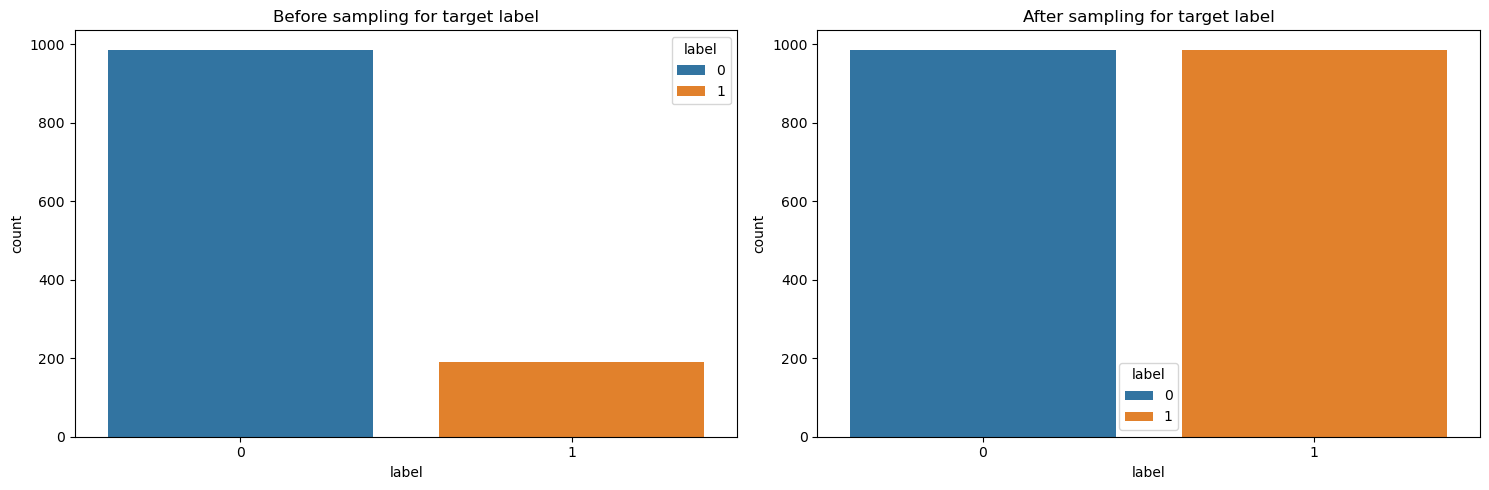

In [115]:
fig = plt.figure(figsize=(15, 5))

# Plot before sampling
ax1 = fig.add_subplot(121)
sns.countplot(data=pd.DataFrame(y_train, columns=['label']), x='label', hue='label', ax=ax1)
ax1.set_title("Before sampling for target label")

# Plot after sampling
ax2 = fig.add_subplot(122)
sns.countplot(data=pd.DataFrame(y_train_os, columns=['label']), x='label', hue='label', ax=ax2)
ax2.set_title("After sampling for target label")

# Show the plot
plt.tight_layout()
plt.show()

#### Combined Sampling - SMOTEENN

In [118]:
combined_sm = SMOTEENN(random_state=random_state)
X_train_cs, y_train_cs = combined_sm.fit_resample(X_train, y_train)

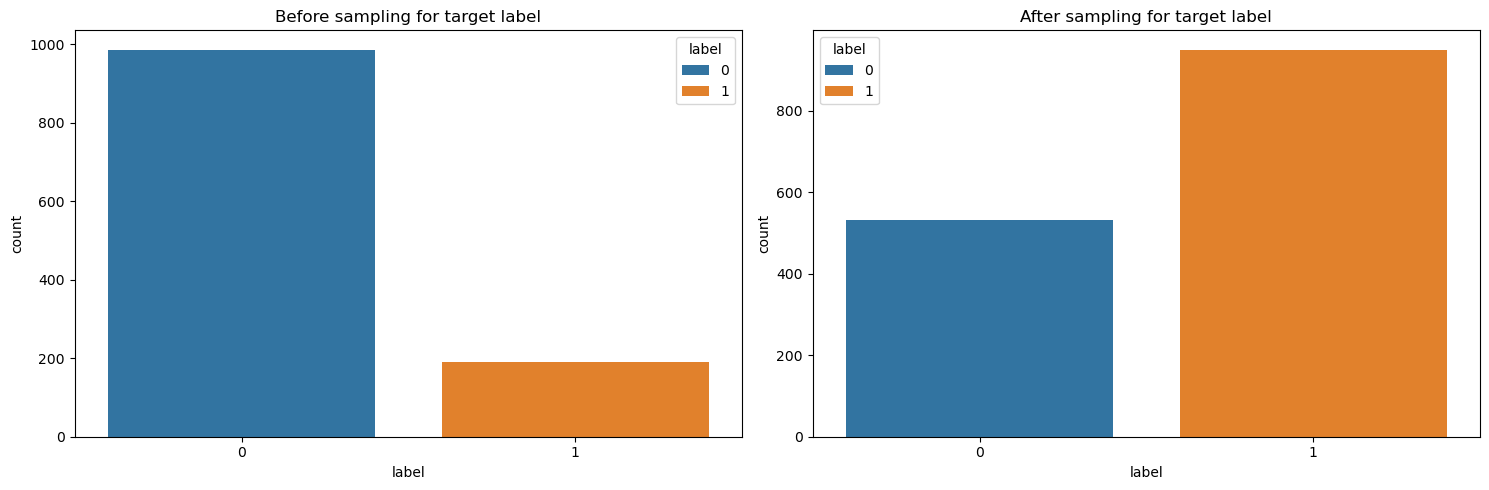

In [120]:
fig = plt.figure(figsize=(15, 5))

# Plot before sampling
ax1 = fig.add_subplot(121)
sns.countplot(data=pd.DataFrame(y_train, columns=['label']), x='label', hue='label', ax=ax1)
ax1.set_title("Before sampling for target label")

# Plot after sampling
ax2 = fig.add_subplot(122)
sns.countplot(data=pd.DataFrame(y_train_cs, columns=['label']), x='label', hue='label', ax=ax2)
ax2.set_title("After sampling for target label")

# Show the plot
plt.tight_layout()
plt.show()

### Summary

- **Feature Selection**: Chose features that passed the previous tests.
- **Data Preprocessing**: Applied Label Encoding and Min-Max Scaling to label and scale the dataset.
- **Sampling**: Addressed class imbalance by using SMOTE and SMOTEENN for dataset sampling.

## 4. Model Analysis

### 4.1 Base Model

In [125]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}


# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")
    print()

Model: Logistic Regression
Accuracy: 0.888
Precision: 0.878
Recall: 0.888
F1-score: 0.874
ROC-AUC: 0.827

Model: Random Forest
Accuracy: 0.861
Precision: 0.847
Recall: 0.861
F1-score: 0.824
ROC-AUC: 0.822

Model: XGBoost
Accuracy: 0.871
Precision: 0.855
Recall: 0.871
F1-score: 0.854
ROC-AUC: 0.823



### 4.2 Models with Sampled Dataset

In [128]:
# Train and evaluate models
print("SMOTEENN")
for name, model in models.items():
    model.fit(X_train_cs, y_train_cs)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")
    print()
    

print("---------------")
print()


print("SMOTE")
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_os, y_train_os)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")
    print()

SMOTEENN
Model: Logistic Regression
Accuracy: 0.837
Precision: 0.867
Recall: 0.837
F1-score: 0.848
ROC-AUC: 0.816

Model: Random Forest
Accuracy: 0.813
Precision: 0.837
Recall: 0.813
F1-score: 0.823
ROC-AUC: 0.775

Model: XGBoost
Accuracy: 0.820
Precision: 0.854
Recall: 0.820
F1-score: 0.832
ROC-AUC: 0.806

---------------

SMOTE
Model: Logistic Regression
Accuracy: 0.888
Precision: 0.878
Recall: 0.888
F1-score: 0.876
ROC-AUC: 0.825

Model: Random Forest
Accuracy: 0.861
Precision: 0.841
Recall: 0.861
F1-score: 0.843
ROC-AUC: 0.813

Model: XGBoost
Accuracy: 0.874
Precision: 0.860
Recall: 0.874
F1-score: 0.861
ROC-AUC: 0.794



### 4.3 Grid Search for Hyper paramter tuning

In [131]:
# Define parameter grids for each model

param_grids = {
    'Logistic Regression': 
        {
            'penalty': [None],
            'solver': ['lbfgs', 'newton-cg'],
            'max_iter': [100, 200, 300]
        }
    ,
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2', None],
        'max_depth': [10, 20, 30, None],
        'criterion': ['gini', 'entropy']
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.7, 0.8, 0.9]
    }
}


### With non-sampled data

In [134]:
results = {}

# Assuming X_train, y_train, X_test, y_test are already defined
# Train and evaluate models using GridSearchCV and k-fold cross-validation

for name, model in models.items():
    print(f"Performing GridSearchCV for {name}...")
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=3, scoring='roc_auc', n_jobs=-1, verbose=2, error_score='raise')
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and the best combined score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best parameters: {best_params}")
    print(f"Best combined score from grid search: {best_score:.4f}")

    # Use the best estimator to make predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Calculate and print evaluation metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        'best_params': best_params,
        'best_score': f"{best_score:.3f}",
        'metrics': {
            'accuracy': f"{accuracy:.3f}",
            'precision': f"{precision:.3f}",
            'recall': f"{recall:.3f}",
            'f1_score': f"{f1:.3f}",
            'roc_auc': f"{roc_auc:.3f}"
        }
    }

    print(f"Evaluation metrics for {name} with best parameters:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")
    print()

Performing GridSearchCV for Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'max_iter': 100, 'penalty': None, 'solver': 'lbfgs'}
Best combined score from grid search: 0.8488
Evaluation metrics for Logistic Regression with best parameters:
Accuracy: 0.874
Precision: 0.861
Recall: 0.874
F1-score: 0.862
ROC-AUC: 0.819

Performing GridSearchCV for Random Forest...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
Best combined score from grid search: 0.8220
Evaluation metrics for Random Forest with best parameters:
Accuracy: 0.861
Precision: 0.847
Recall: 0.861
F1-score: 0.824
ROC-AUC: 0.812

Performing GridSearchCV for XGBoost...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.7}
Best combined score from grid search: 0.

In [135]:
for model, details in results.items():
    print(f"Model: {model}")
    print(f"Best Score: {details['best_score']}")
    print("Metrics:")
    for metric, value in details['metrics'].items():
        print(f"  {metric}: {value}")
    print()  # Add a blank line for better readability

Model: Logistic Regression
Best Score: 0.849
Metrics:
  accuracy: 0.874
  precision: 0.861
  recall: 0.874
  f1_score: 0.862
  roc_auc: 0.819

Model: Random Forest
Best Score: 0.822
Metrics:
  accuracy: 0.861
  precision: 0.847
  recall: 0.861
  f1_score: 0.824
  roc_auc: 0.812

Model: XGBoost
Best Score: 0.819
Metrics:
  accuracy: 0.871
  precision: 0.857
  recall: 0.871
  f1_score: 0.847
  roc_auc: 0.793



### With over sampled data

In [139]:
results = {}

# Train and evaluate models using GridSearchCV and k-fold cross-validation
for name, model in models.items():
    print(f"Performing GridSearchCV for {name}...")
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
    grid_search.fit(X_train_os, y_train_os)
    
    # Get the best parameters and the best combined score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best parameters: {best_params}")
    print(f"Best combined score from grid search: {best_score:.4f}")

    # Use the best estimator to make predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Calculate and print evaluation metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        'best_params': best_params,
        'best_score': f"{best_score:.3f}",
        'metrics': {
            'accuracy': f"{accuracy:.3f}",
            'precision': f"{precision:.3f}",
            'recall': f"{recall:.3f}",
            'f1_score': f"{f1:.3f}",
            'roc_auc': f"{roc_auc:.3f}"
        }
    }

    print(f"Evaluation metrics for {name} with best parameters:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")
    print()

Performing GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'max_iter': 100, 'penalty': None, 'solver': 'newton-cg'}
Best combined score from grid search: 0.9648
Evaluation metrics for Logistic Regression with best parameters:
Accuracy: 0.867
Precision: 0.853
Recall: 0.867
F1-score: 0.857
ROC-AUC: 0.817

Performing GridSearchCV for Random Forest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 100}
Best combined score from grid search: 0.9917
Evaluation metrics for Random Forest with best parameters:
Accuracy: 0.857
Precision: 0.834
Recall: 0.857
F1-score: 0.833
ROC-AUC: 0.808

Performing GridSearchCV for XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}
Best combined score from grid search: 

In [140]:
for model, details in results.items():
    print(f"Model: {model}")
    print(f"Best Score: {details['best_score']}")
    print("Metrics:")
    for metric, value in details['metrics'].items():
        print(f"  {metric}: {value}")
    print()  # Add a blank line for better readability

Model: Logistic Regression
Best Score: 0.965
Metrics:
  accuracy: 0.867
  precision: 0.853
  recall: 0.867
  f1_score: 0.857
  roc_auc: 0.817

Model: Random Forest
Best Score: 0.992
Metrics:
  accuracy: 0.857
  precision: 0.834
  recall: 0.857
  f1_score: 0.833
  roc_auc: 0.808

Model: XGBoost
Best Score: 0.988
Metrics:
  accuracy: 0.874
  precision: 0.860
  recall: 0.874
  f1_score: 0.857
  roc_auc: 0.793



### Best model

In [146]:
best_logistic_regression = LogisticRegression()

# Fit the model to your training data
best_logistic_regression.fit(X_train, y_train)
y_pred = best_logistic_regression.predict(X_test)
y_proba = best_logistic_regression.predict_proba(X_test)[:, 1]

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)


print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

Accuracy: 0.888
Precision: 0.878
Recall: 0.888
F1-score: 0.874
ROC-AUC: 0.827


### Summary

- Logistic Regression generally achieves the highest metric scores.
- Models trained on sampled data perform slightly worse compared to those trained on upsampled data.
- Hyperparameter tuning through GridSearchCV performs slightly worse.

#### Logistic Regression Results

| Metric    | Base | SMOTE | Base & GridSearch | SMOTE & Grid Search |
|-----------|------|-------|-------------------|---------------------|
| Accuracy  | 0.888| 0.888 | 0.874             | 0.867               |
| Precision | 0.878| 0.878 | 0.861             | 0.853               |
| Recall    | 0.888| 0.888 | 0.874             | 0.867               |
| F1-score  | 0.874| 0.876 | 0.862             | 0.857               |
| ROC-AUC   | 0.827| 0.825 | 0.819             | 0.817               |



## 5. Model Interpretation

### Confusion Matrix

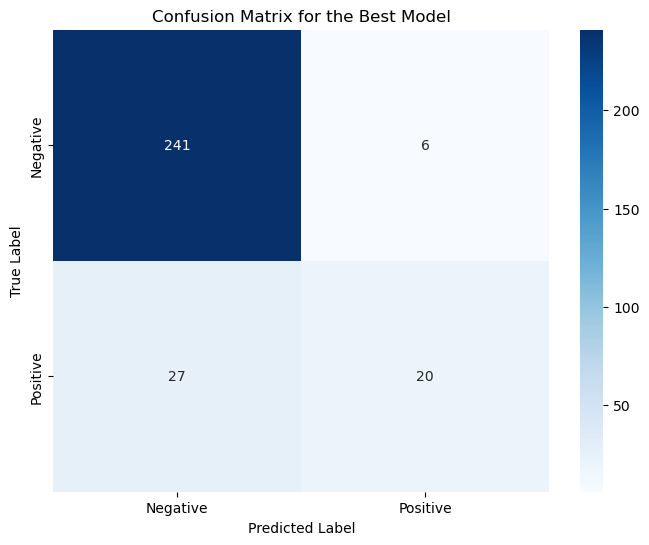

In [152]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for the Best Model')
plt.show()

### Feature Importance

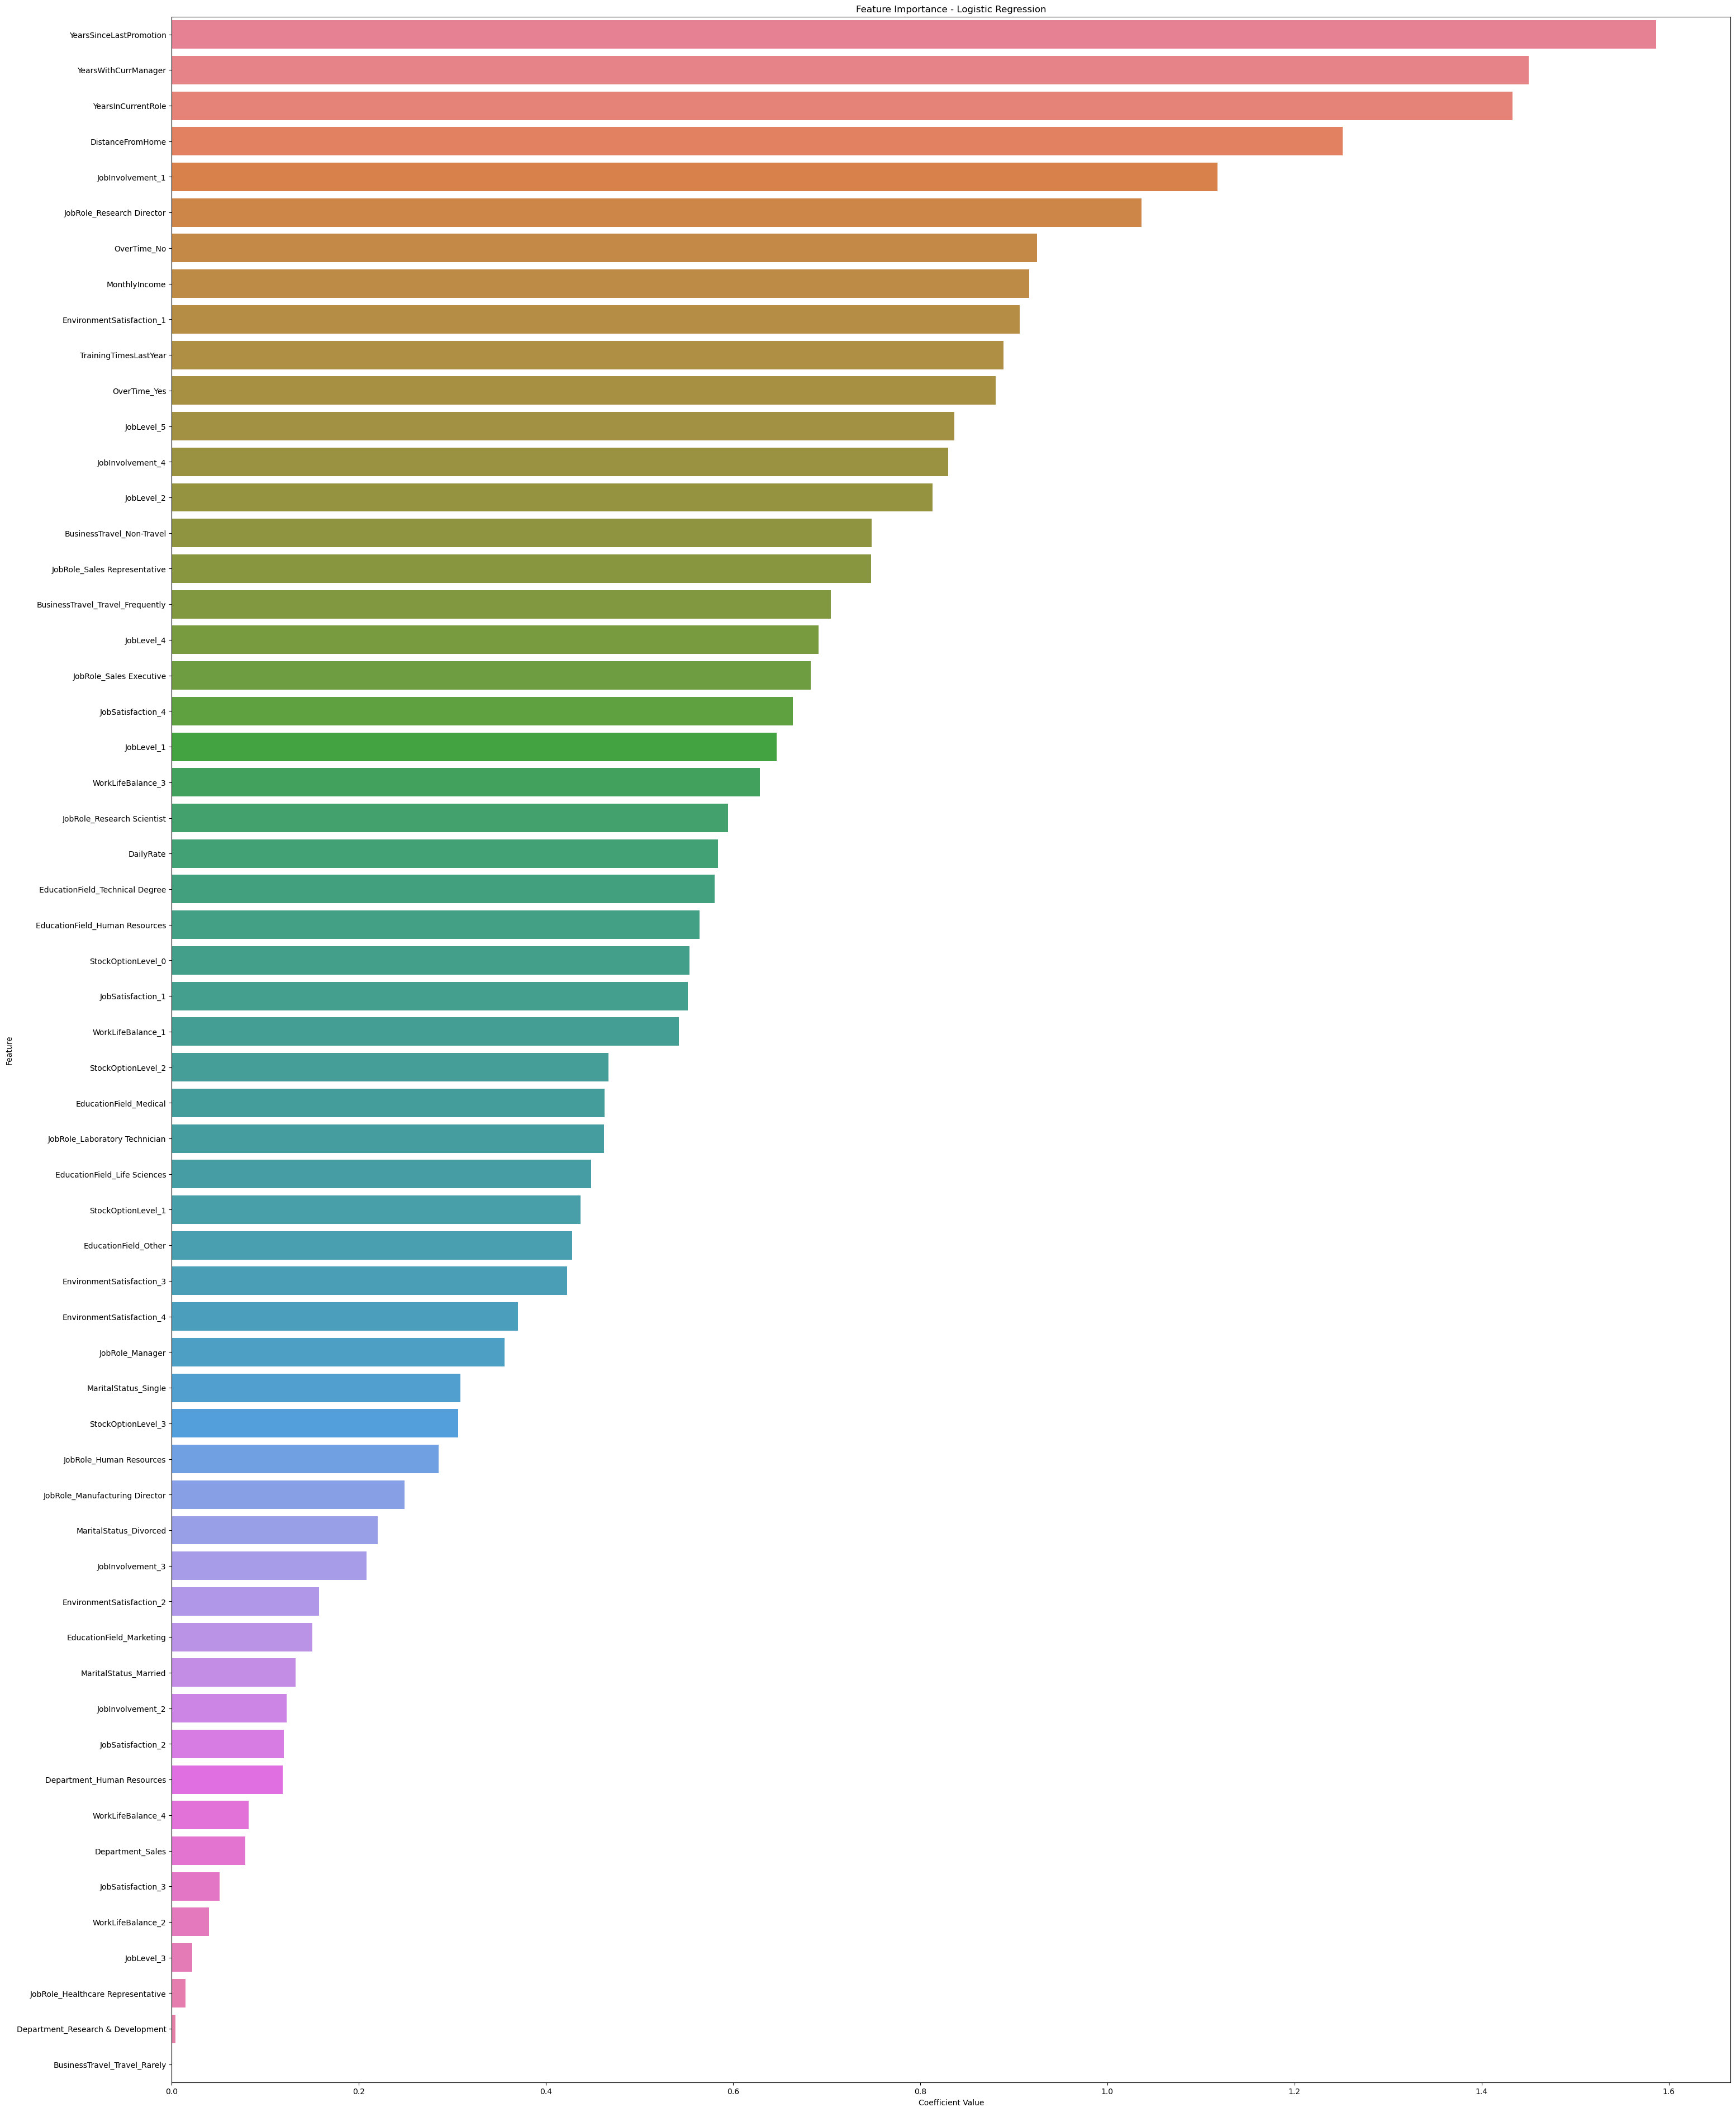

In [155]:
coefficients = best_logistic_regression.coef_[0]
feature_names = best_logistic_regression.feature_names_in_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort the DataFrame by the absolute value of coefficients (importance)
feature_importance_df['Abs_Importance'] = feature_importance_df['Importance'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Importance', ascending=False)

# Plotting
plt.figure(figsize=(36, 48))
sns.barplot(x='Abs_Importance', y='Feature', data=feature_importance_df, hue = "Feature")
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

### Shapley Value

In [158]:
X_test = X_test.map(lambda x: int(x) if isinstance(x, bool) else x)

explainer = shap.Explainer(lambda x : best_logistic_regression.predict_log_proba(x)[:,1], X_test)
shap_values = explainer(X_test)

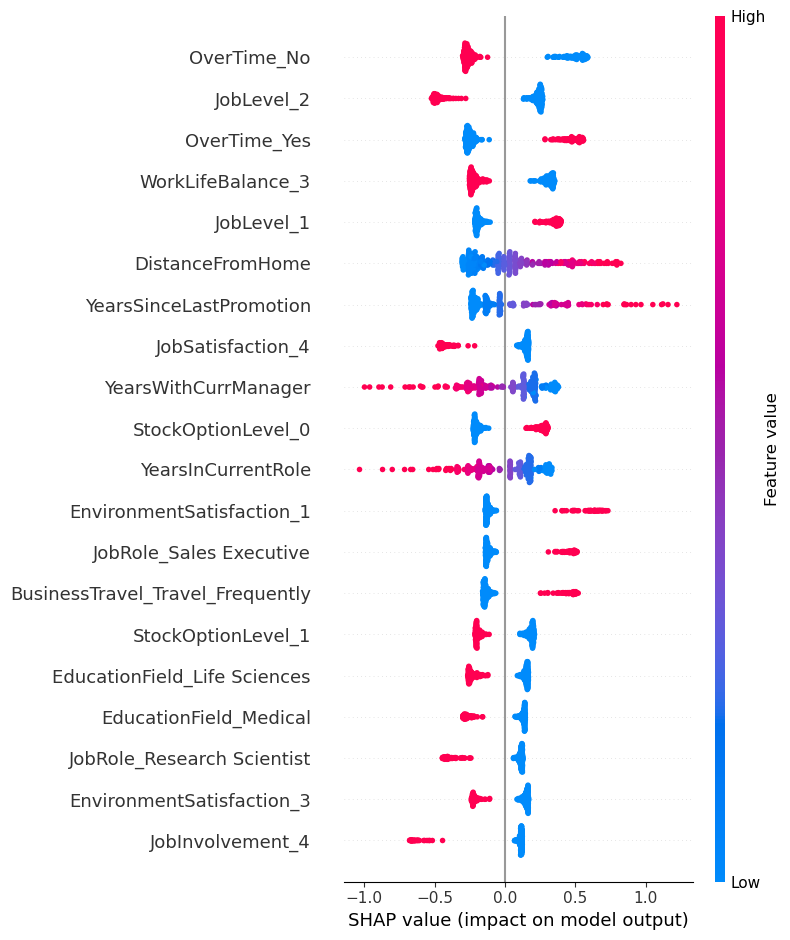

In [159]:
shap.summary_plot(shap_values, X_test)

In [160]:
shap.initjs()
shap.plots.force(shap_values[0])

### Summary

**Feature Importance:** 
The bar plot reveals that the most important features are 
- Years_Since_Last_Promotion
- YearsWithCurrManager
- YearsInCurrentRole


**SHAP Summary Plot:**

- Years_Since_Last_Promotion positively influences the prediction.
- YearsInCurrentRole negatively impacts the prediction.
- DistanceFromHome positively affects the prediction.
- YearsWithCurrManager negatively affects the prediction.

## 6. Summary of Findings and Recommendations

**Key Findings:**
- The Years_Since_Last_Promotion feature positively influences the prediction, suggesting that employees who have not been promoted in a long time are more likely to leave.
- The YearsInCurrentRole feature negatively impacts the prediction, indicating that employees who have been in their current role for a longer period are less likely to leave.
- The DistanceFromHome feature positively affects the prediction, implying that employees who live farther from work are more likely to leave.
- The "YearsWithCurrManager" variable negatively impacts the prediction, indicating that employees who have been with their current manager for a longer period are less likely to leave.


**Recommendations**

- Promotion and Career Development: Implement a transparent and structured promotion pathway to reduce the risk of attrition for employees who haven't been promoted in a long time.
- Location Flexibility: Offer flexible work arrangements or remote work options to employees who live farther from the office to reduce the impact of commuting on attrition.
- Managerial Relationship: Foster strong relationships between employees and their managers by providing training and support for managers in leadership and communication skills.


**Limitations**
- Lack of Background Information: The dataset lacks detailed background information, making it difficult to fully understand the context and specifics, which can hinder accurate insights and interpretations.
- Grid Search Parameters: Exploring a wider range of parameters in grid search might improve the performance of the predictive model, suggesting that the current model may not be fully optimized.
- Class Imbalance: The dataset suffers from class imbalance, which can skew the model's predictions and lead to biased results, potentially underestimating the likelihood of employee attrition in minority classes.